# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Hamdan Azani
- **Email:** hamdanpesat@gmail.com
- **ID Dicoding:** Hamdan Azani

## Menentukan Pertanyaan Bisnis

- Seberapa besar faktor cuaca mempengaruhi kenaikkan penggunaan sepeda?
- Pada range bulan berapa sepeda paling banyak dipinjam tiap tahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
#Pertama mari kita mengimport library yang akan kita gunakan
import numpy as np #Library numpy biasa digunakan untuk melakukan perhitungan statistik pada dataframe seperti mean, median, quartile dan lainnya
import pandas as pd #pandas merupakan library yang biasa digunakan dalam process dataframe mulai dari gathering, processing hingga cleaning data
import seaborn as sns #Seaborn merupakan library untuk membuat visualisasi data
import matplotlib.pyplot as plt #Matplotlib merupakan library untuk membuat visualisasi data

## Data Wrangling

### Gathering Data

Data yang digunakan dalam proyek ini adalah data open-source peminjaman sepeda yang didapatkan dari situs kaggle, kemudian saya mendownloadnya dan menaruhnya pada github pribadi saya untuk diimport ke ipnyb ini

In [2]:
#Pertama mari kita import datasetnya
dfDay = pd.read_csv("https://raw.githubusercontent.com/Zaniiiii/Data/main/dicoding/analisisPython/bike/day.csv")
dfHour = pd.read_csv("https://raw.githubusercontent.com/Zaniiiii/Data/main/dicoding/analisisPython/bike/hour.csv")

In [3]:
dfDay.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
dfDay.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [5]:
dfHour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
dfHour.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


Sepertinya dataset dibagi menjadi 2 macam: dataset per hari dan dataset per jam, mari kita ulik lebih dalam

### Assessing Data

Pertama mari kita kolom sesaon, mnth dan weathersit menjadi nilai yang dapat dibaca untuk mempermudah saat visualisasi nanti

In [7]:
# Konversi nilai untuk kolom 'mnth' menjadi nama bulan
dfHour.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
dfDay.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom 'weathersit' menjadi string
dfDay.weathersit.replace((1,2,3,4), ('Baik','Mendung','Buruk','Sangat Buruk'), inplace=True)
dfHour.weathersit.replace((1,2,3,4), ('Baik','Mendung','Buruk','Sangat Buruk'), inplace=True)

# Konversi nilai untuk kolom 'season' menjadi nama musimnya
dfDay.season.replace((1,2,3,4), ('Dingin','Semi','Panas','Gugur'), inplace=True)
dfHour.season.replace((1,2,3,4), ('Dingin','Semi','Panas','Gugur'), inplace=True)
dfDay

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Dingin,0,Jan,0,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Dingin,0,Jan,0,0,0,Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Dingin,0,Jan,0,1,1,Baik,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Dingin,0,Jan,0,2,1,Baik,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Dingin,0,Jan,0,3,1,Baik,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Dingin,1,Dec,0,4,1,Mendung,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Dingin,1,Dec,0,5,1,Mendung,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Dingin,1,Dec,0,6,0,Mendung,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Dingin,1,Dec,0,0,0,Baik,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [8]:
dfHour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Dingin,0,Jan,0,0,6,0,Baik,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Dingin,0,Jan,1,0,6,0,Baik,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Dingin,0,Jan,2,0,6,0,Baik,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Dingin,0,Jan,3,0,6,0,Baik,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Dingin,0,Jan,4,0,6,0,Baik,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Dingin,1,Dec,19,0,1,1,Mendung,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Dingin,1,Dec,20,0,1,1,Mendung,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Dingin,1,Dec,21,0,1,1,Baik,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Dingin,1,Dec,22,0,1,1,Baik,0.26,0.2727,0.56,0.1343,13,48,61


Sekarang mari kita lihat apakah ada data null dalam dataset ini

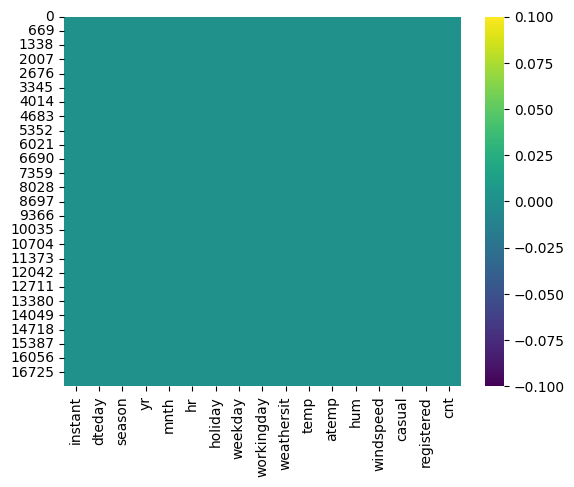

In [9]:
# Membuat heatmap NaN
sns.heatmap(dfHour.isnull(), cmap='viridis')
plt.show()

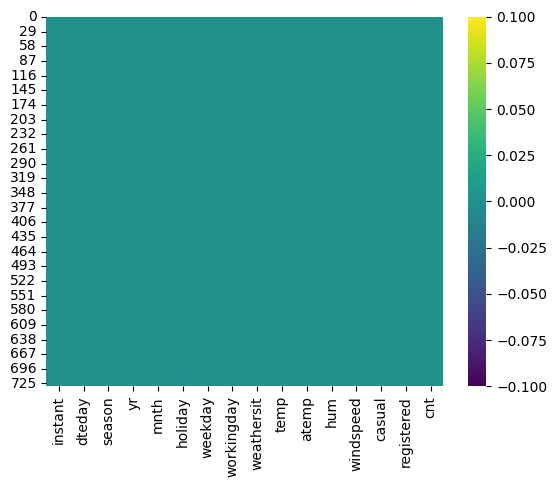

In [10]:
# Membuat heatmap NaN
sns.heatmap(dfDay.isnull(), cmap='viridis')
plt.show()

Berdasarkan heatmap diatas, tidak ada data null dalam dataset ini, sekarang mari kita cek apakah ada duplikat dalam dataset ini

In [11]:
dfDay.duplicated().sum()

0

In [12]:
dfHour.duplicated().sum()

0

Ternyata tidak ada duplikat, mari kita satukan dataset per hari dan per jam menjadi satu dataset

In [13]:
#Melakukan merger dataframe
df = dfHour.merge(dfDay, on='dteday', how='inner',suffixes=("Hour","Day"))
df.head()

,instantHour,dteday,seasonHour,yrHour,mnthHour,hr,holidayHour,weekdayHour,workingdayHour,weathersitHour,...,weekdayDay,workingdayDay,weathersitDay,tempDay,atempDay,humDay,windspeedDay,casualDay,registeredDay,cntDay
0,1,2011-01-01,Dingin,0,Jan,0,0,6,0,Baik,...,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,Dingin,0,Jan,1,0,6,0,Baik,...,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,Dingin,0,Jan,2,0,6,0,Baik,...,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,Dingin,0,Jan,3,0,6,0,Baik,...,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,Dingin,0,Jan,4,0,6,0,Baik,...,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985


In [14]:
#Merubah tipe dteday menjadi datetime
df['dteday'] = pd.to_datetime(df['dteday'])
dfDay['dteday'] = pd.to_datetime(dfDay['dteday'])
dfHour['dteday'] = pd.to_datetime(dfHour['dteday'])
df.head()

,instantHour,dteday,seasonHour,yrHour,mnthHour,hr,holidayHour,weekdayHour,workingdayHour,weathersitHour,...,weekdayDay,workingdayDay,weathersitDay,tempDay,atempDay,humDay,windspeedDay,casualDay,registeredDay,cntDay
0,1,2011-01-01,Dingin,0,Jan,0,0,6,0,Baik,...,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,Dingin,0,Jan,1,0,6,0,Baik,...,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,Dingin,0,Jan,2,0,6,0,Baik,...,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,Dingin,0,Jan,3,0,6,0,Baik,...,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,Dingin,0,Jan,4,0,6,0,Baik,...,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985


Sekarang mari kita lihat apakah ada outliers dalam dataset ini

In [15]:
#Mengambil semua kolom dalam dataframe
colmns = df.columns
colmns

Index(['instantHour', 'dteday', 'seasonHour', 'yrHour', 'mnthHour', 'hr',
       'holidayHour', 'weekdayHour', 'workingdayHour', 'weathersitHour',
       'tempHour', 'atempHour', 'humHour', 'windspeedHour', 'casualHour',
       'registeredHour', 'cntHour', 'instantDay', 'seasonDay', 'yrDay',
       'mnthDay', 'holidayDay', 'weekdayDay', 'workingdayDay', 'weathersitDay',
       'tempDay', 'atempDay', 'humDay', 'windspeedDay', 'casualDay',
       'registeredDay', 'cntDay'],
      dtype='object')

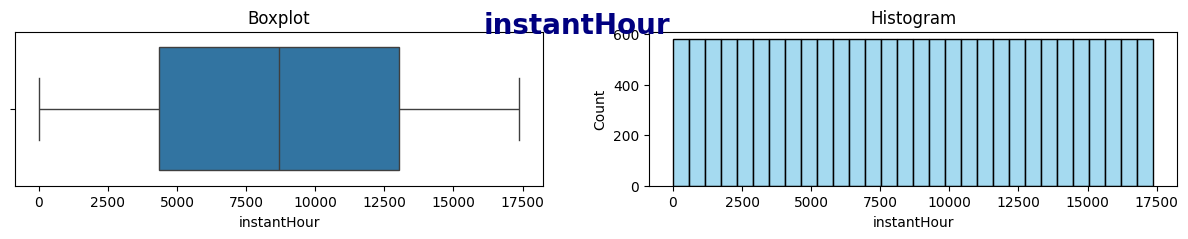

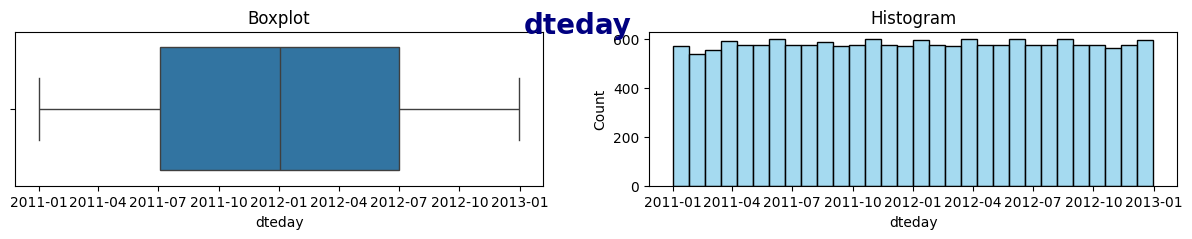

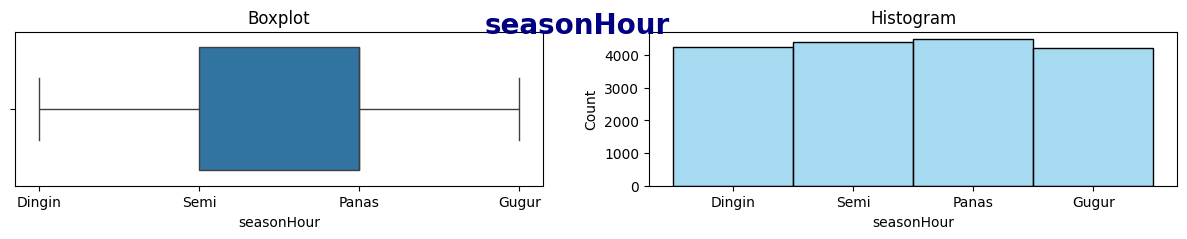

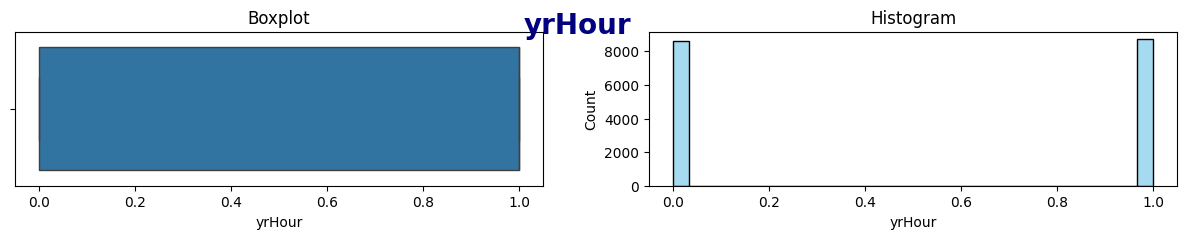

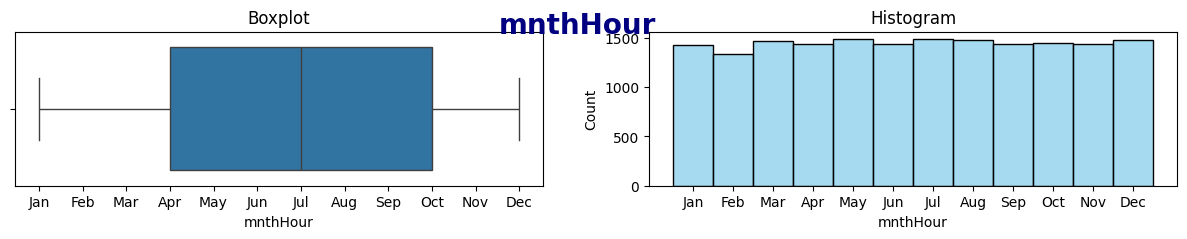

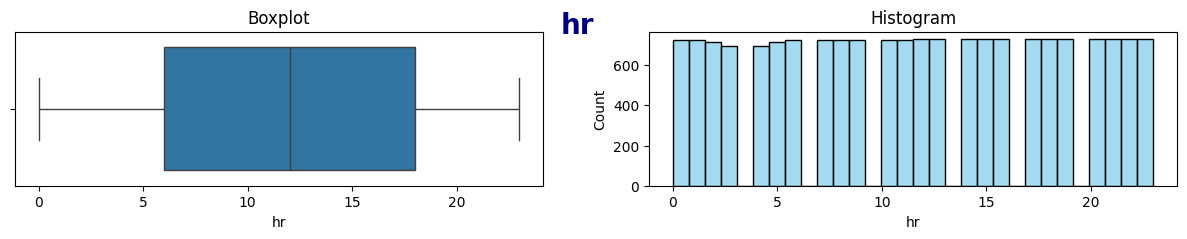

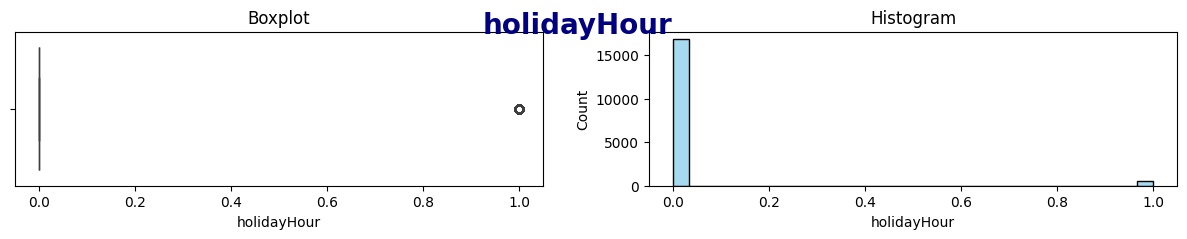

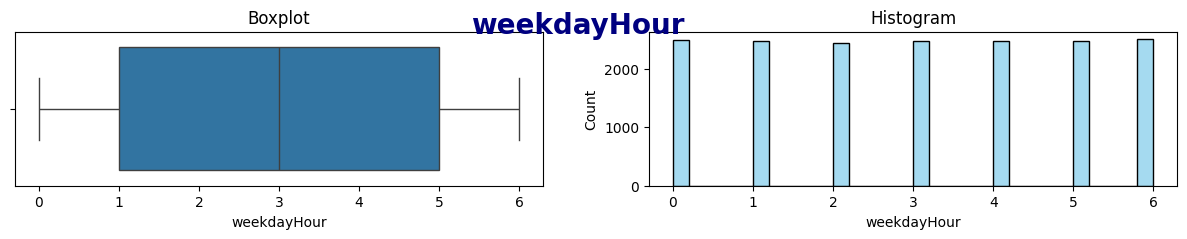

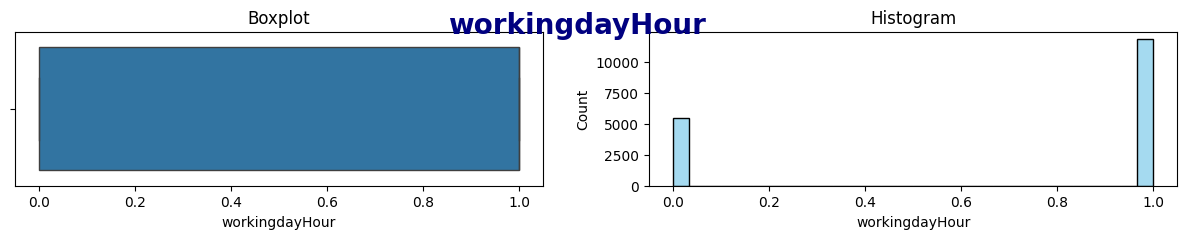

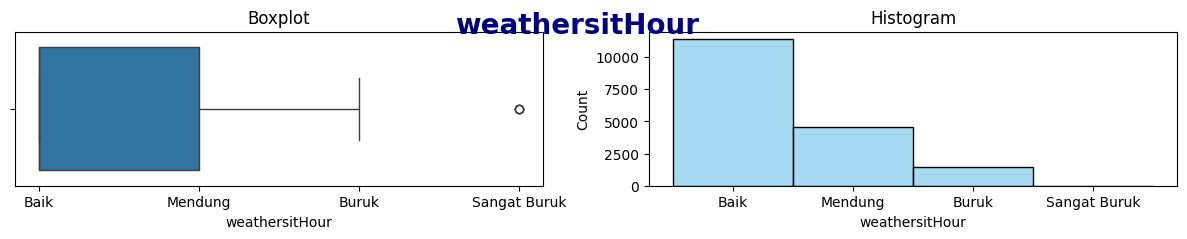

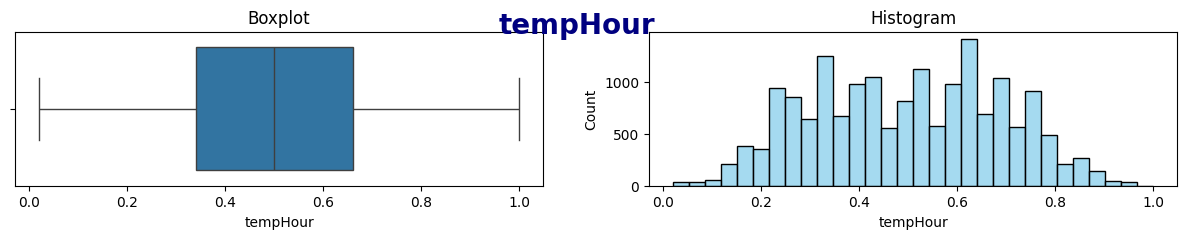

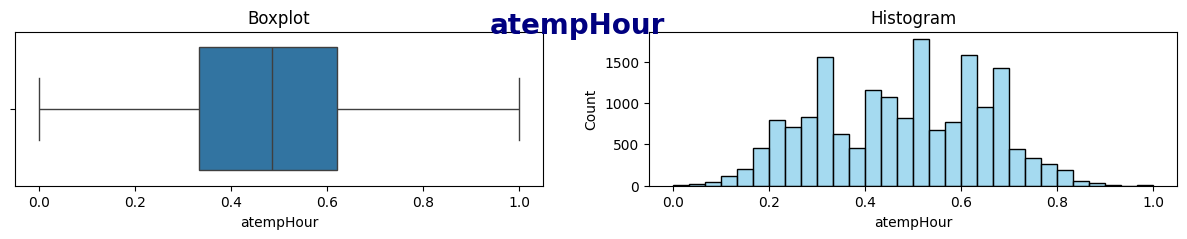

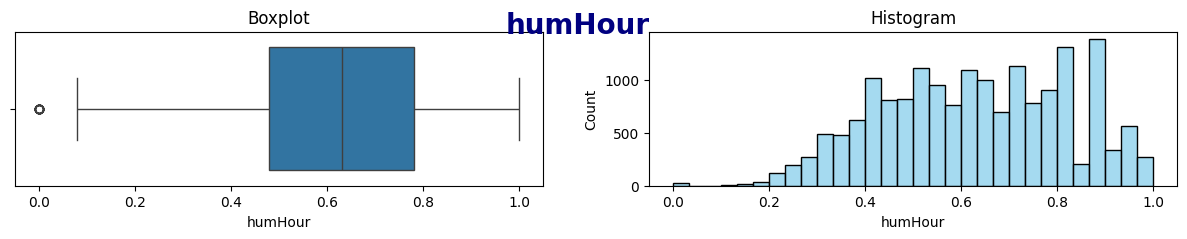

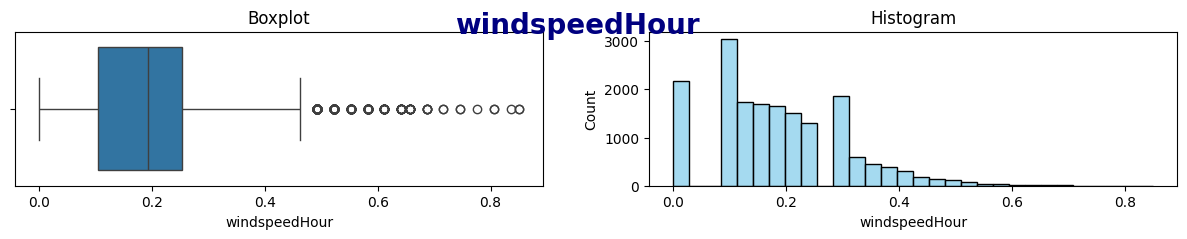

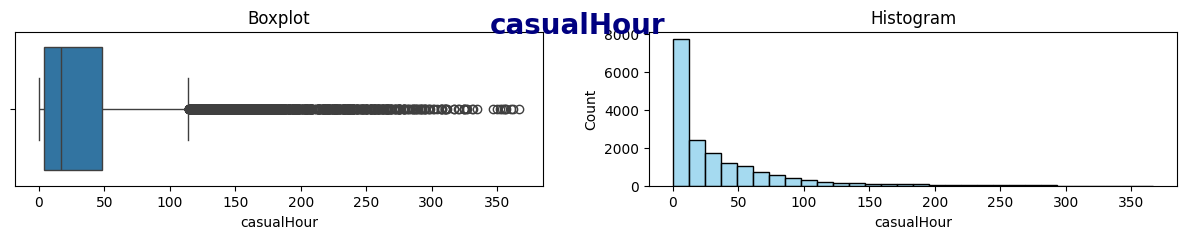

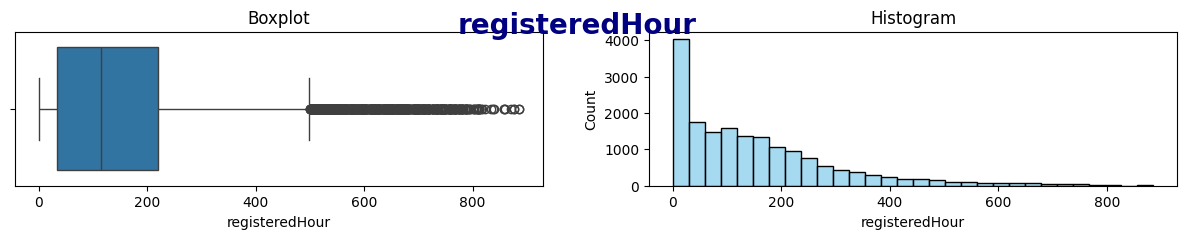

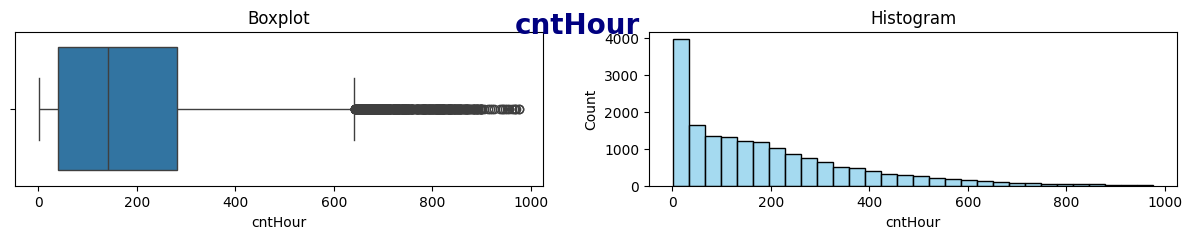

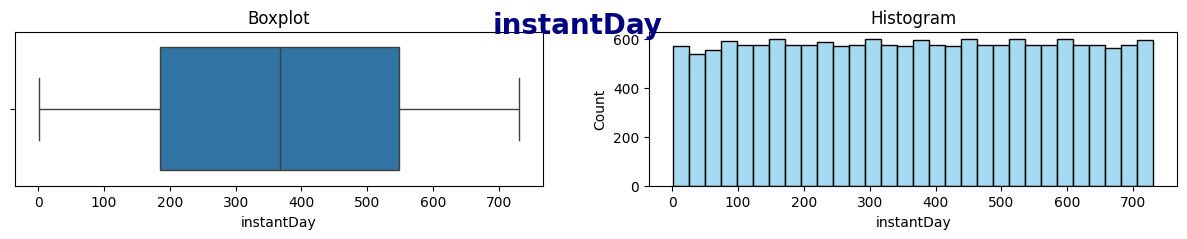

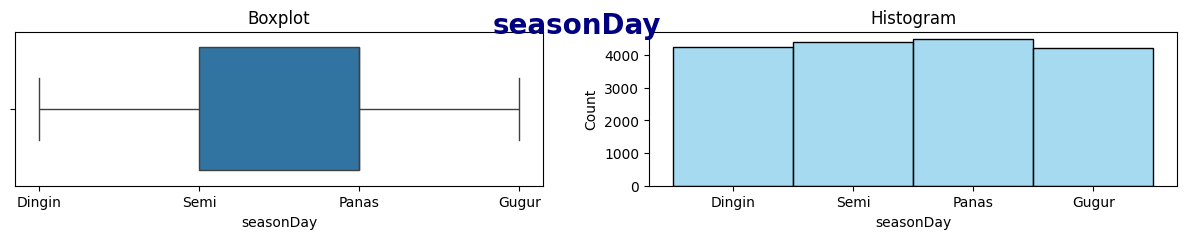

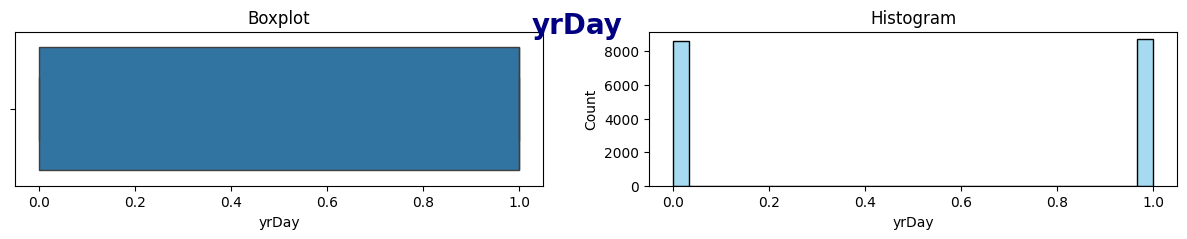

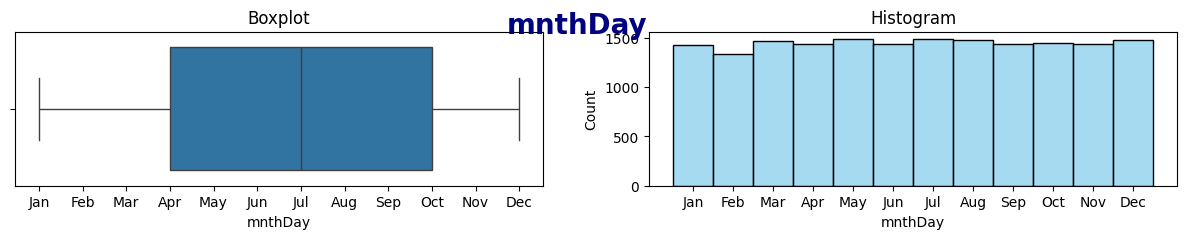

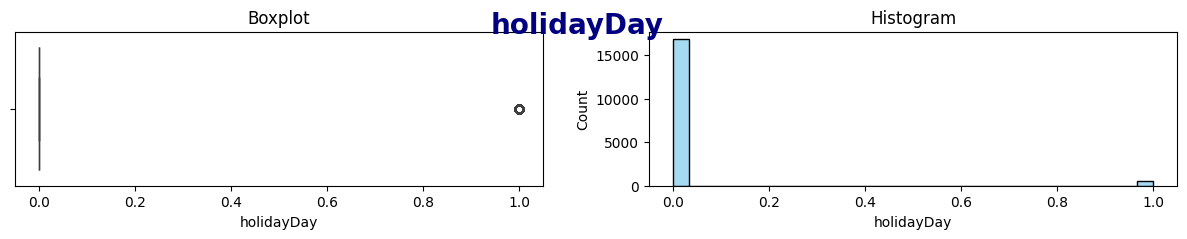

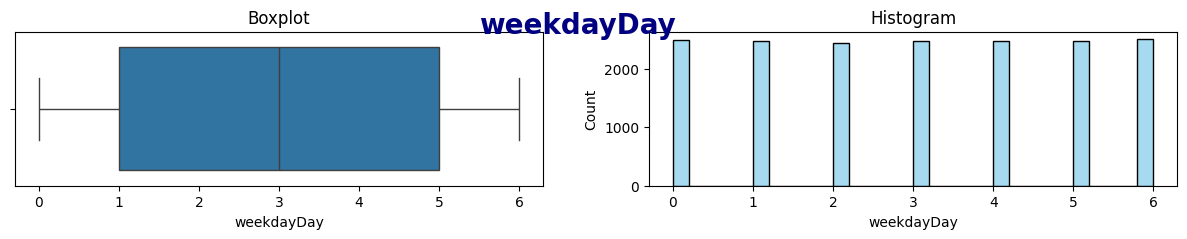

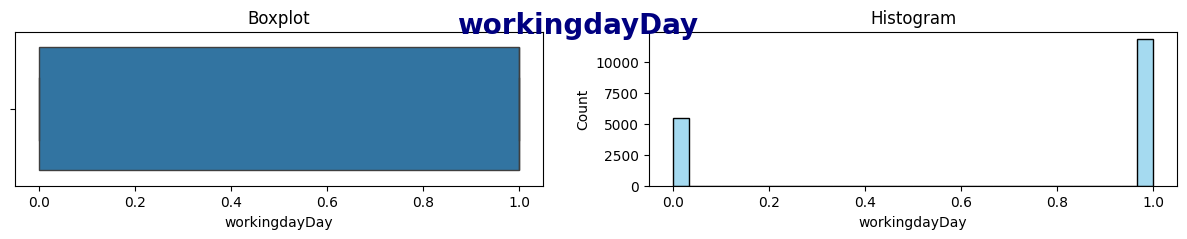

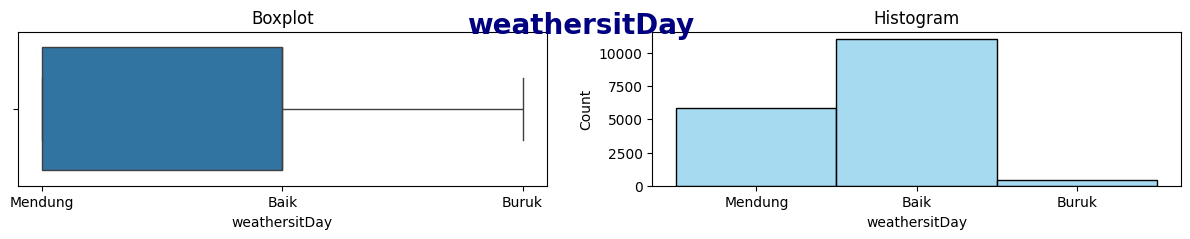

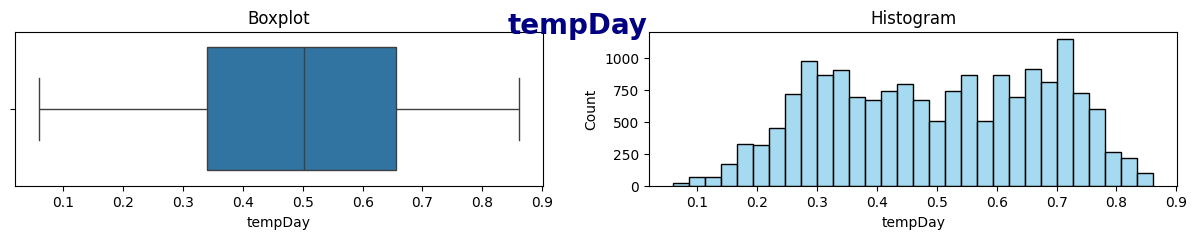

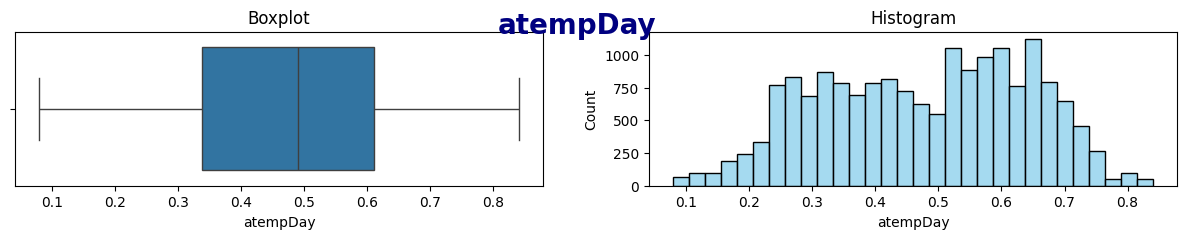

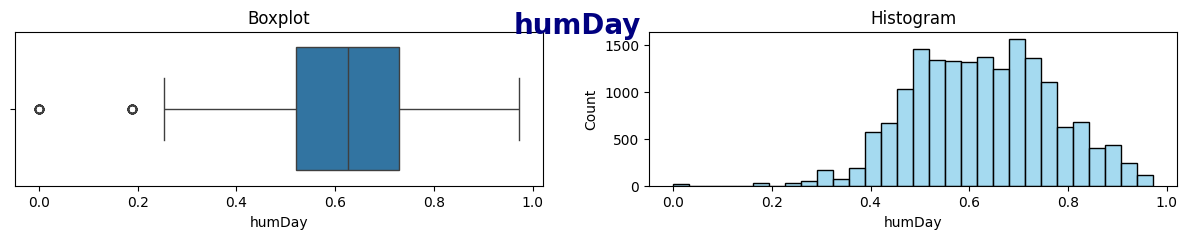

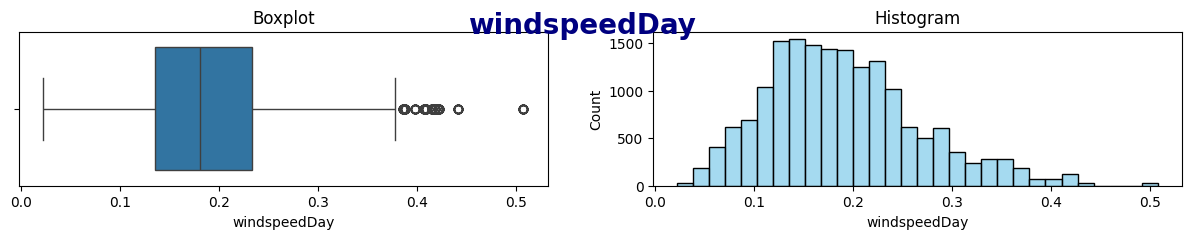

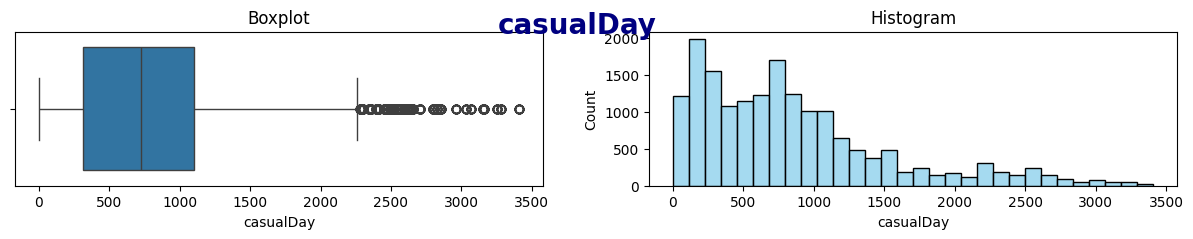

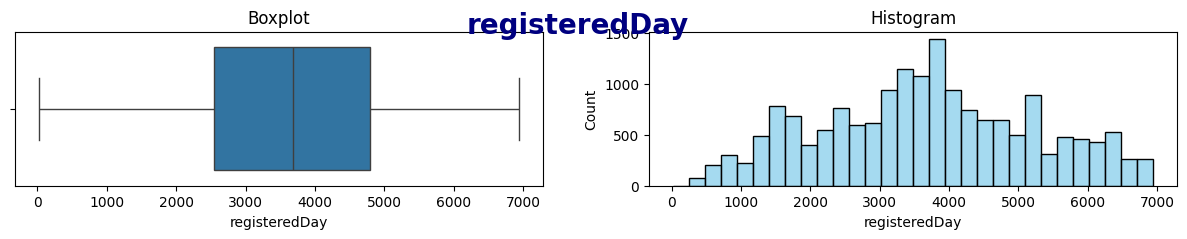

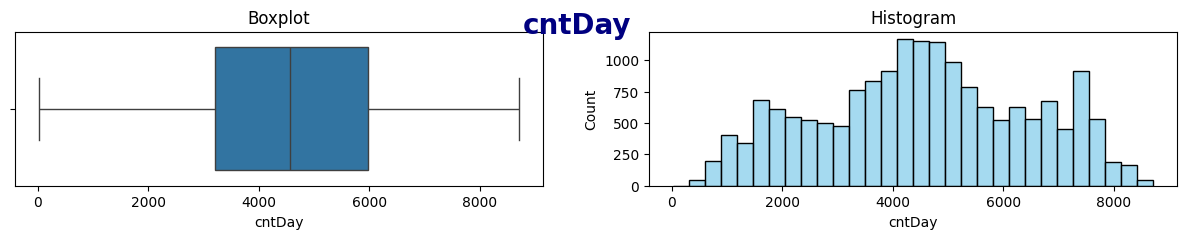

In [16]:
for i in range(0, len(colmns)):
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    plt.suptitle(colmns[i], fontsize=20, fontweight='bold', color='navy')

    # Membuat boxplot
    sns.boxplot(x=colmns[i], data=df, ax=ax[0])
    ax[0].set_title('Boxplot')

    # Membuat histogram
    sns.histplot(data=df, x=colmns[i], bins=30, color='skyblue', ax=ax[1])
    ax[1].set_title('Histogram')

    plt.show()

Berdasarkan boxplot diatas terdapat beberapa kolom yang mempunyai outlier (terkecuali data kategorikal) mari kita lakukan cleaning outlier diatas

### Cleaning Data

Kita akan membersihkan outlier diatas dengan menggunakan metode imputation di mana outliernya akan kita ganti dengan median, tetapi karena berdasarkan prinsip data, tidak semua outlier merupakan hal yang buruk dan harus diganti, oleh karena itu kita hanya akan mengganti outlier yang termasuk dalam 99.5 percentile

In [17]:
# Fungsi untuk mengganti nilai outlier dengan median pada kolom tertentu
def imputationMedian(df, columns, percentile):
    for col in columns:
        threshold = np.percentile(df[col], percentile)
        median = df[col].median()
        df[col] = np.where(df[col] > threshold, median, df[col])
    return df

# Kolom yang akan diperlakukan
kolom = ['windspeedHour', 'registeredHour', 'casualHour','cntHour','windspeedDay','casualDay']

# Mengganti outlier dengan median untuk kolom yang ditentukan
df = imputationMedian(df, kolom,99.5)
df

,instantHour,dteday,seasonHour,yrHour,mnthHour,hr,holidayHour,weekdayHour,workingdayHour,weathersitHour,...,weekdayDay,workingdayDay,weathersitDay,tempDay,atempDay,humDay,windspeedDay,casualDay,registeredDay,cntDay
0,1,2011-01-01,Dingin,0,Jan,0,0,6,0,Baik,...,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331.0,654,985
1,2,2011-01-01,Dingin,0,Jan,1,0,6,0,Baik,...,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331.0,654,985
2,3,2011-01-01,Dingin,0,Jan,2,0,6,0,Baik,...,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331.0,654,985
3,4,2011-01-01,Dingin,0,Jan,3,0,6,0,Baik,...,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331.0,654,985
4,5,2011-01-01,Dingin,0,Jan,4,0,6,0,Baik,...,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331.0,654,985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Dingin,1,Dec,19,0,1,1,Mendung,...,1,1,Mendung,0.215833,0.223487,0.577500,0.154846,439.0,2290,2729
17375,17376,2012-12-31,Dingin,1,Dec,20,0,1,1,Mendung,...,1,1,Mendung,0.215833,0.223487,0.577500,0.154846,439.0,2290,2729
17376,17377,2012-12-31,Dingin,1,Dec,21,0,1,1,Baik,...,1,1,Mendung,0.215833,0.223487,0.577500,0.154846,439.0,2290,2729
17377,17378,2012-12-31,Dingin,1,Dec,22,0,1,1,Baik,...,1,1,Mendung,0.215833,0.223487,0.577500,0.154846,439.0,2290,2729


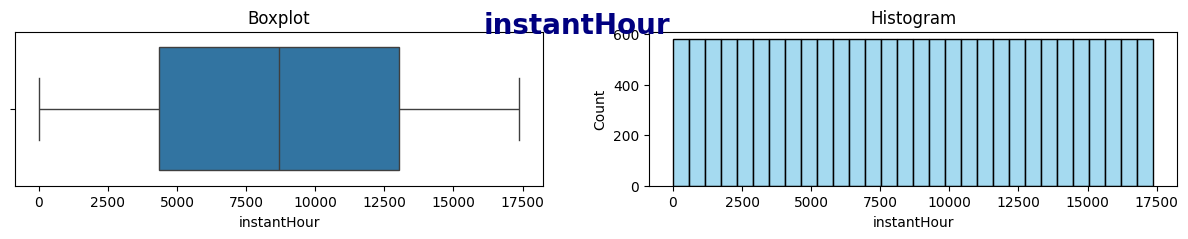

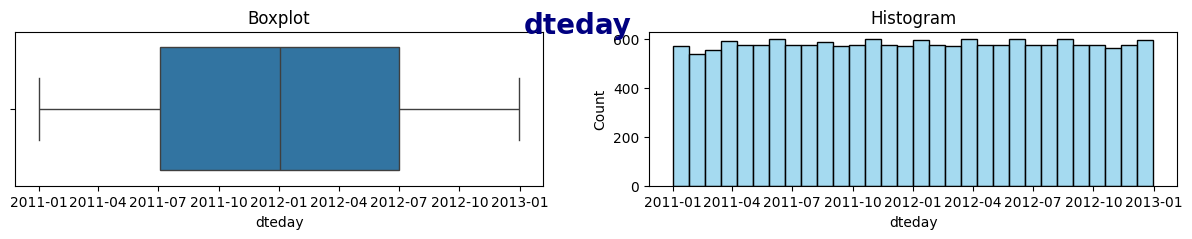

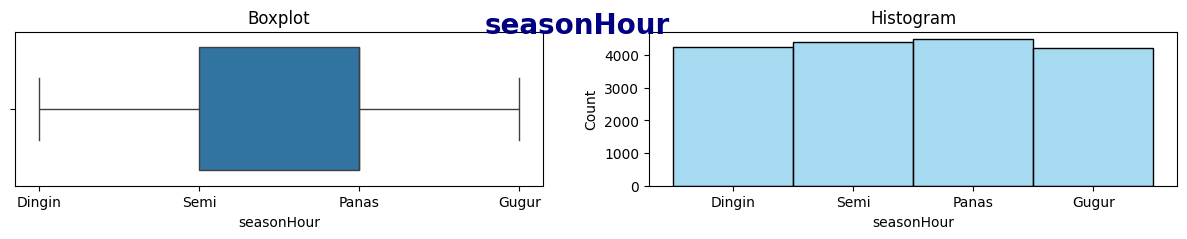

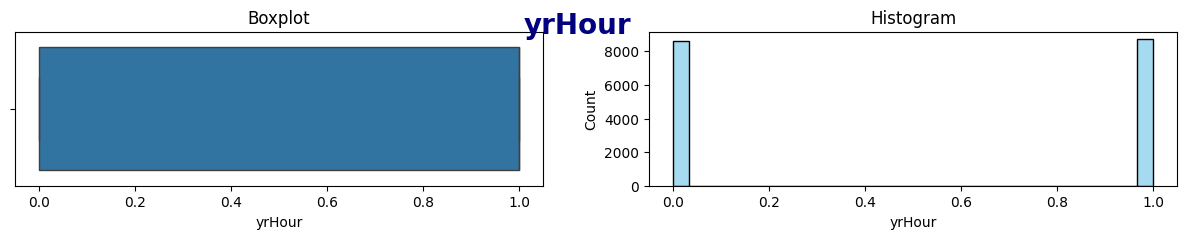

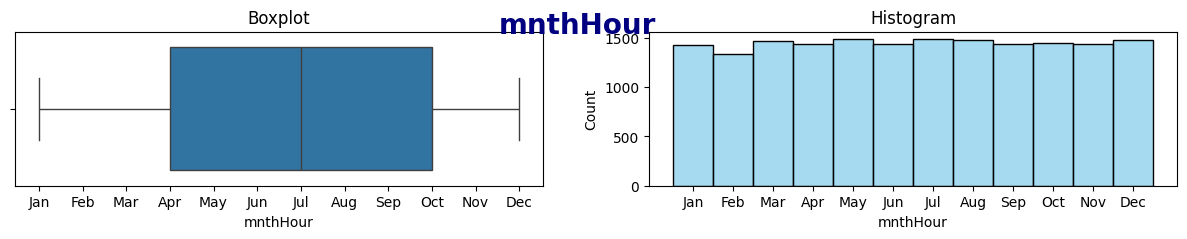

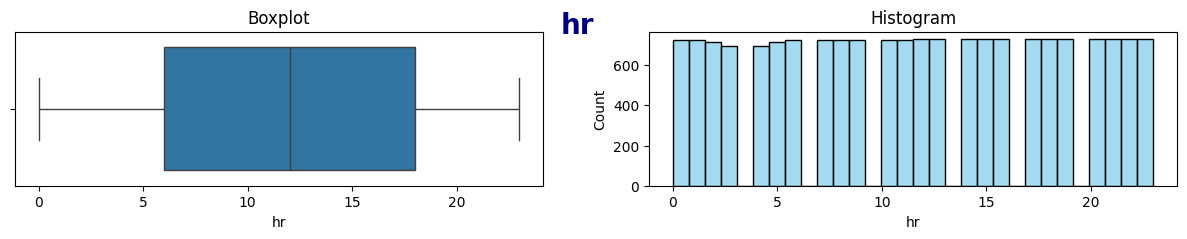

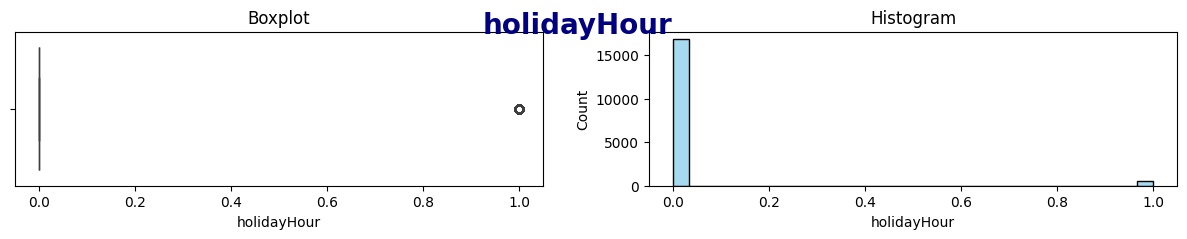

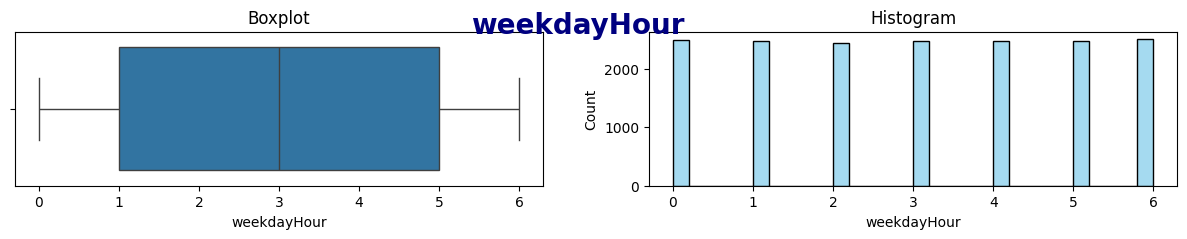

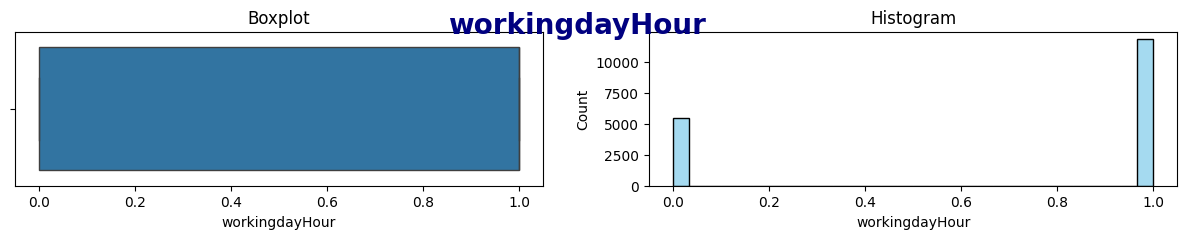

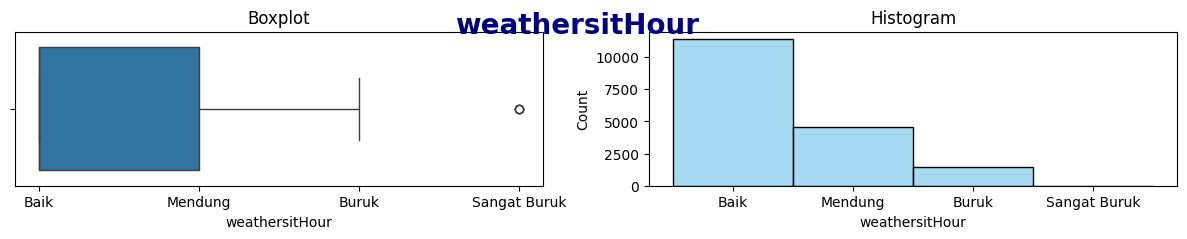

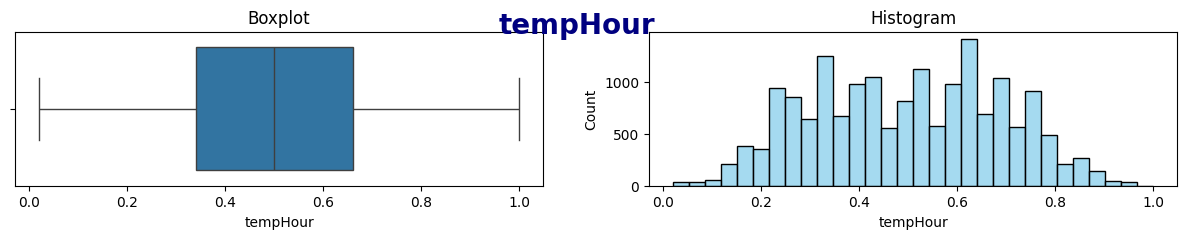

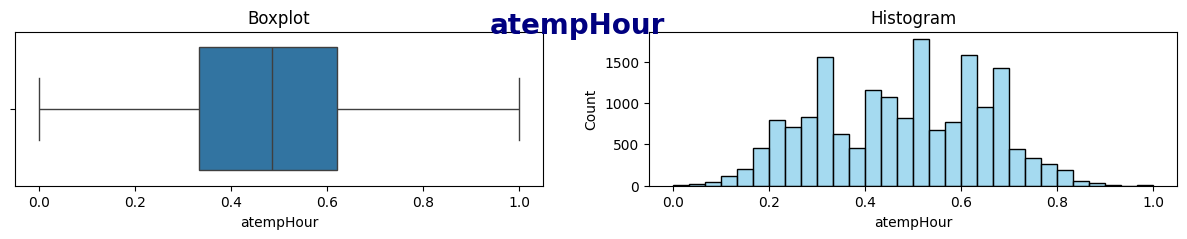

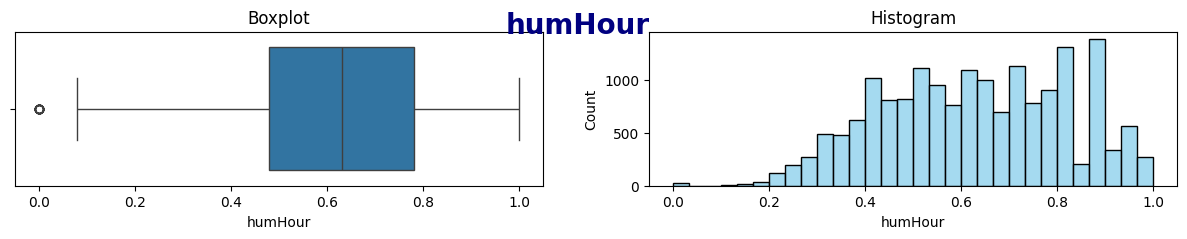

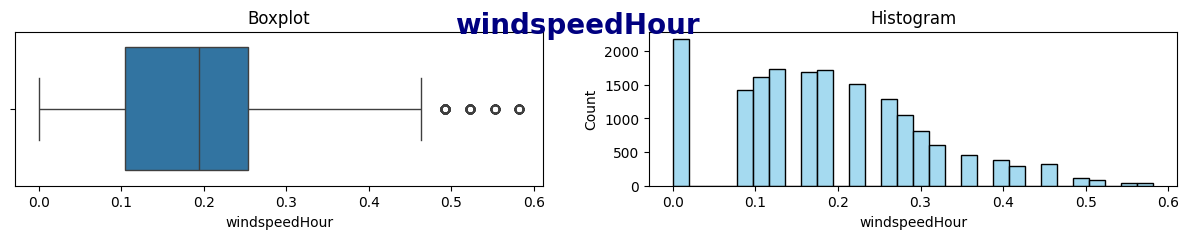

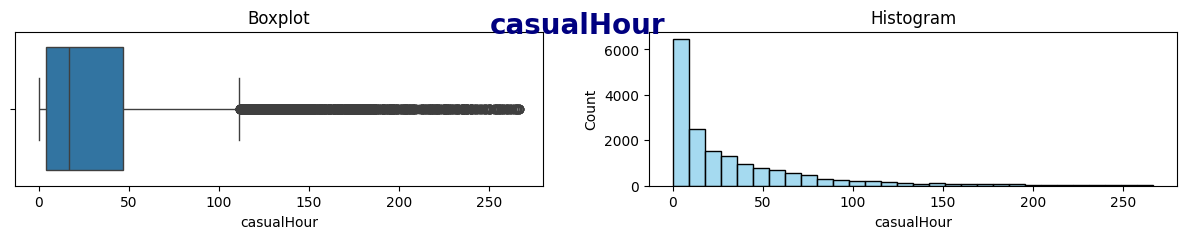

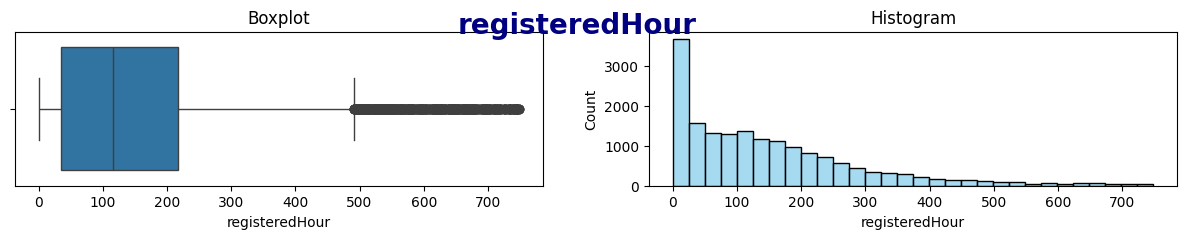

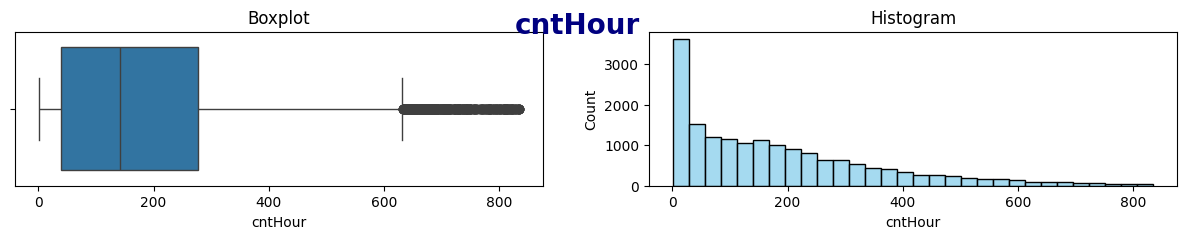

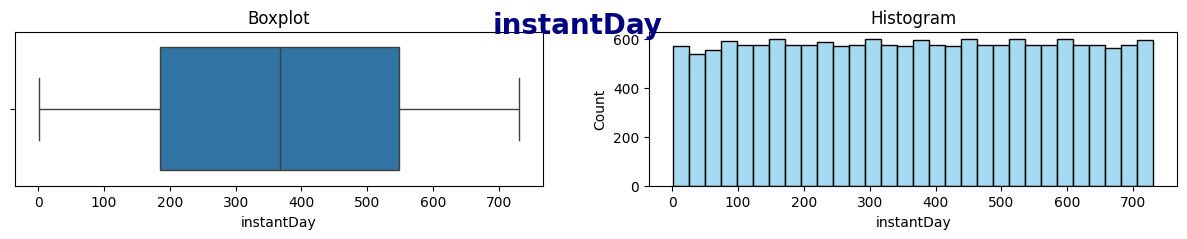

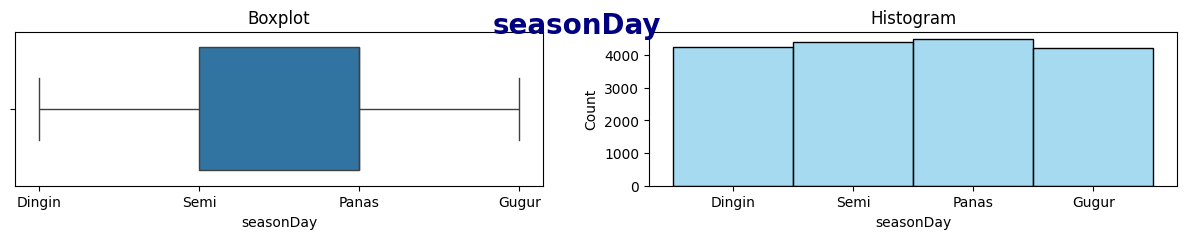

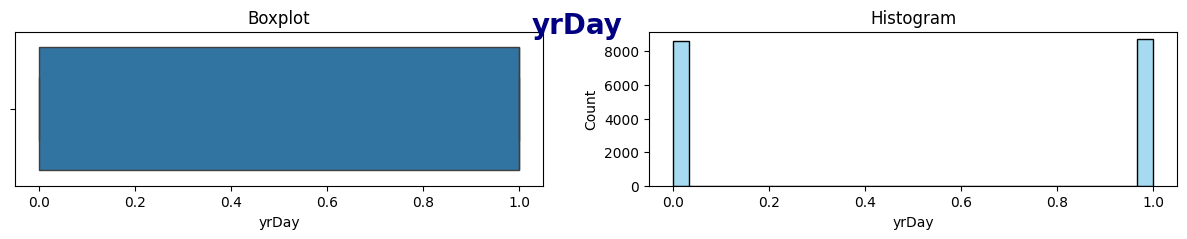

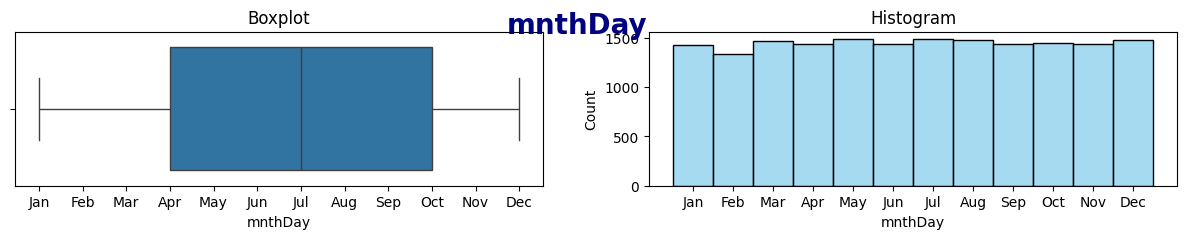

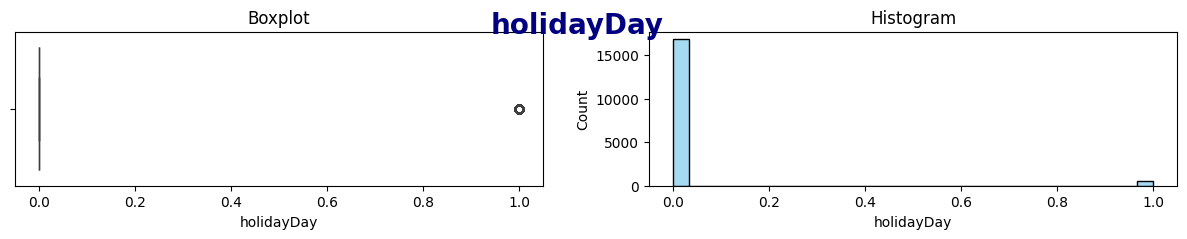

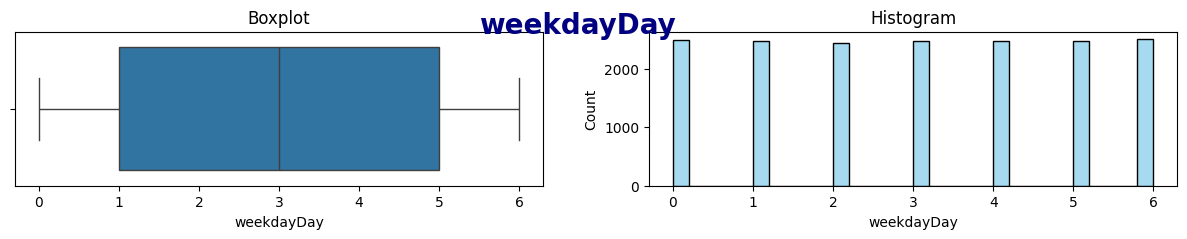

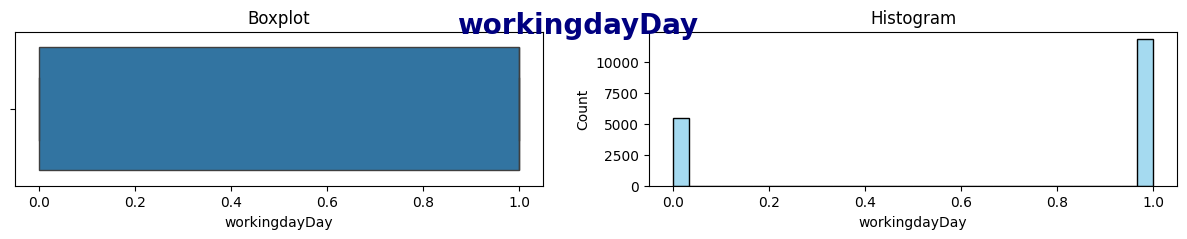

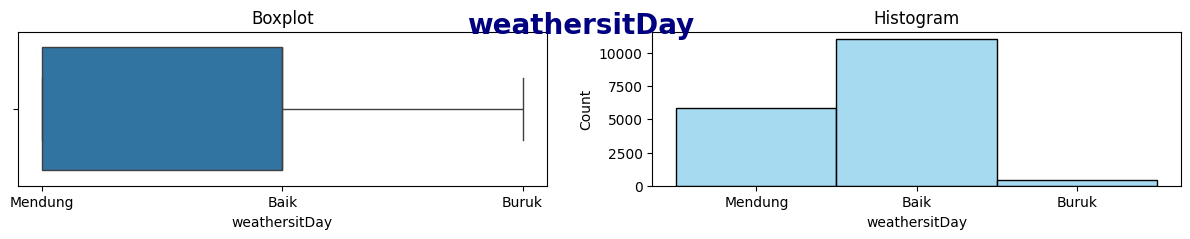

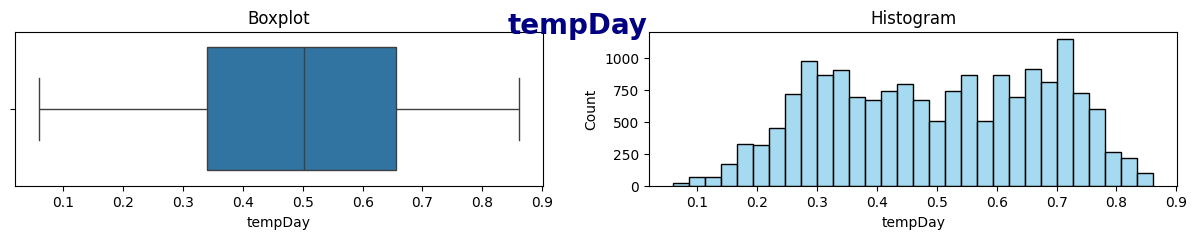

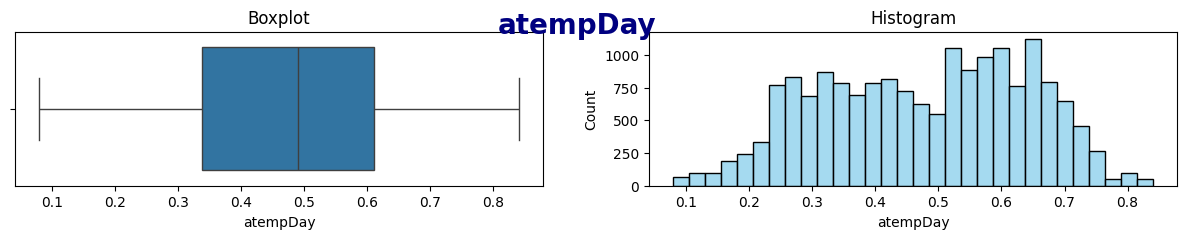

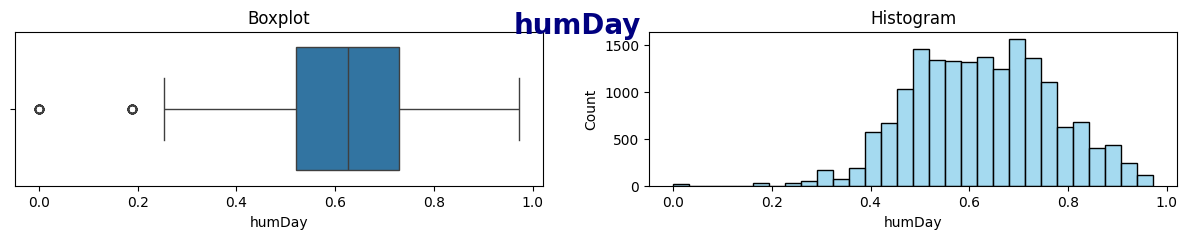

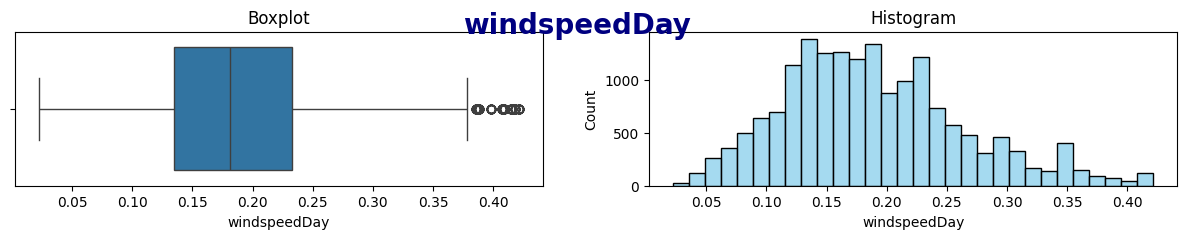

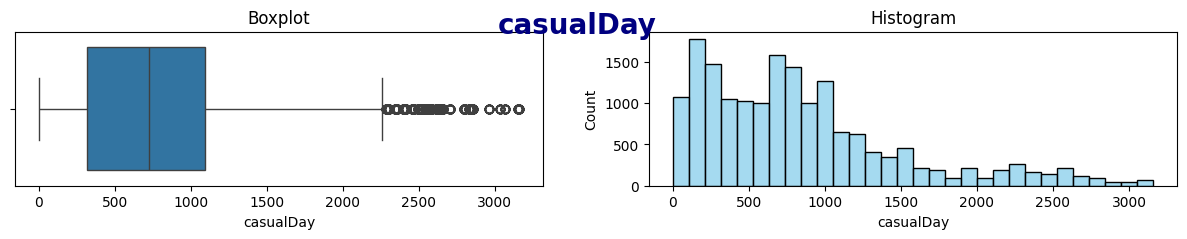

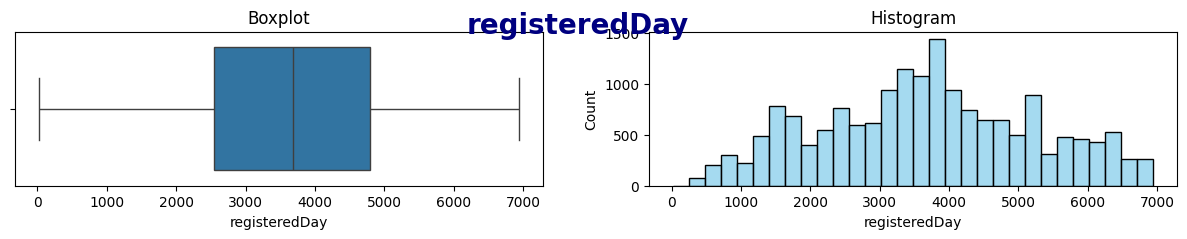

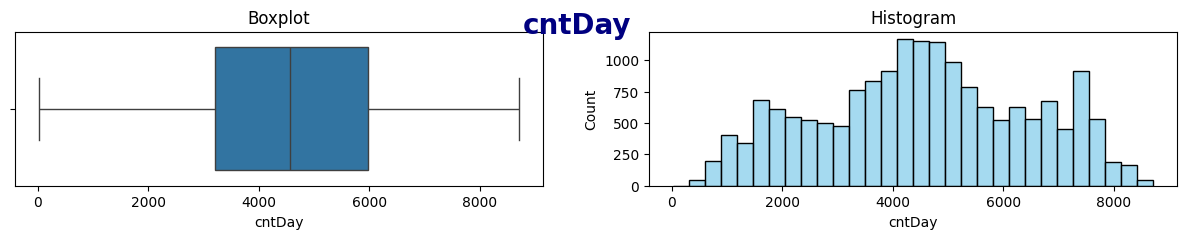

In [18]:
for i in range(0, len(colmns)):
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    plt.suptitle(colmns[i], fontsize=20, fontweight='bold', color='navy')

    # Membuat boxplot
    sns.boxplot(x=colmns[i], data=df, ax=ax[0])
    ax[0].set_title('Boxplot')

    # Membuat histogram
    sns.histplot(data=df, x=colmns[i], bins=30, color='skyblue', ax=ax[1])
    ax[1].set_title('Histogram')

    plt.show()

Walau masih terdapat outlier, tetapi tidak ada yang terlalu menjauhi data lainnya

## Exploratory Data Analysis (EDA)

### Explore ...

Sekarang mari kita telusurui statiska datanya

In [19]:
df.describe()

,instantHour,yrHour,hr,holidayHour,weekdayHour,workingdayHour,tempHour,atempHour,humHour,windspeedHour,...,holidayDay,weekdayDay,workingdayDay,tempDay,atempDay,humDay,windspeedDay,casualDay,registeredDay,cntDay
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,11.546752,0.028770,3.003683,0.682721,0.496987,0.475775,0.627229,0.188409,...,0.028770,3.003683,0.682721,0.496987,0.475775,0.627229,0.188954,843.605386,3679.353242,4533.692963
std,5017.0295,0.500008,6.914405,0.167165,2.005771,0.465431,0.192556,0.171850,0.192930,0.118956,...,0.167165,2.005771,0.465431,0.182445,0.162426,0.141779,0.075224,667.095086,1544.953518,1917.376947
min,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,0.000000,6.000000,0.000000,1.000000,0.000000,0.340000,0.333300,0.480000,0.104500,...,0.000000,1.000000,0.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,1.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,...,0.000000,3.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,1.000000,18.000000,0.000000,5.000000,1.000000,0.660000,0.621200,0.780000,0.253700,...,0.000000,5.000000,1.000000,0.655833,0.610488,0.729583,0.232583,1094.000000,4801.000000,5986.000000
max,17379.0000,1.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.582100,...,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.421642,3160.000000,6946.000000,8714.000000


In [20]:
df.corr()

<ipython-input-20-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,instantHour,yrHour,hr,holidayHour,weekdayHour,workingdayHour,tempHour,atempHour,humHour,windspeedHour,...,holidayDay,weekdayDay,workingdayDay,tempDay,atempDay,humDay,windspeedDay,casualDay,registeredDay,cntDay
instantHour,1.000000,0.866014,-0.004775,0.014723,0.001357,-0.003416,0.136178,0.137615,0.009577,-0.072611,...,0.014723,0.001357,-0.003416,0.143514,0.145394,0.013548,-0.112359,0.272047,0.666838,0.635346
yrHour,0.866014,1.000000,-0.003867,0.006692,-0.004485,-0.002196,0.040913,0.039222,-0.083546,-0.009305,...,0.006692,-0.004485,-0.002196,0.043181,0.041497,-0.113688,-0.008496,0.238862,0.599744,0.571927
hr,-0.004775,-0.003867,1.000000,0.000479,-0.003498,0.002285,0.137603,0.133750,-0.276498,0.135018,...,0.000479,-0.003498,0.002285,-0.007823,-0.007840,-0.001111,-0.000014,-0.005553,-0.008389,-0.008729
holidayHour,0.014723,0.006692,0.000479,1.000000,-0.102088,-0.252471,-0.027340,-0.030973,-0.010588,0.006544,...,1.000000,-0.102088,-0.252471,-0.028856,-0.032770,-0.014408,0.009103,0.058412,-0.111327,-0.070344
weekdayHour,0.001357,-0.004485,-0.003498,-0.102088,1.000000,0.035955,-0.001795,-0.008821,-0.037158,0.011052,...,-0.102088,1.000000,0.035955,-0.001894,-0.009333,-0.050564,0.005174,0.052145,0.053629,0.064204
workingdayHour,-0.003416,-0.002196,0.002285,-0.252471,0.035955,1.000000,0.055390,0.054667,0.015688,-0.009526,...,-0.252471,0.035955,1.000000,0.058460,0.057839,0.021347,-0.016728,-0.508671,0.314491,0.068216
tempHour,0.136178,0.040913,0.137603,-0.027340,-0.001795,0.055390,1.000000,0.987672,-0.069881,-0.019990,...,-0.027340,-0.001795,0.055390,0.947491,0.939540,0.124365,-0.154350,0.518969,0.508241,0.592402
atempHour,0.137615,0.039222,0.133750,-0.030973,-0.008821,0.054667,0.987672,1.000000,-0.051918,-0.059008,...,-0.030973,-0.008821,0.054667,0.937229,0.945161,0.136360,-0.180022,0.518475,0.511182,0.594557
humHour,0.009577,-0.083546,-0.276498,-0.010588,-0.037158,0.015688,-0.069881,-0.051918,1.000000,-0.286251,...,-0.010588,-0.037158,0.015688,0.096457,0.106022,0.734874,-0.179779,-0.040964,-0.060236,-0.067356
windspeedHour,-0.072611,-0.009305,0.135018,0.006544,0.011052,-0.009526,-0.019990,-0.059008,-0.286251,1.000000,...,0.006544,0.011052,-0.009526,-0.098900,-0.115113,-0.160158,0.608700,-0.102622,-0.127620,-0.138496


Sepertinya dalam bentuk tabel masih tidak bisa terlalu dipahami, mari kita lihat dalam bentuk visualisasi

<ipython-input-21-2d79a49f72da>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


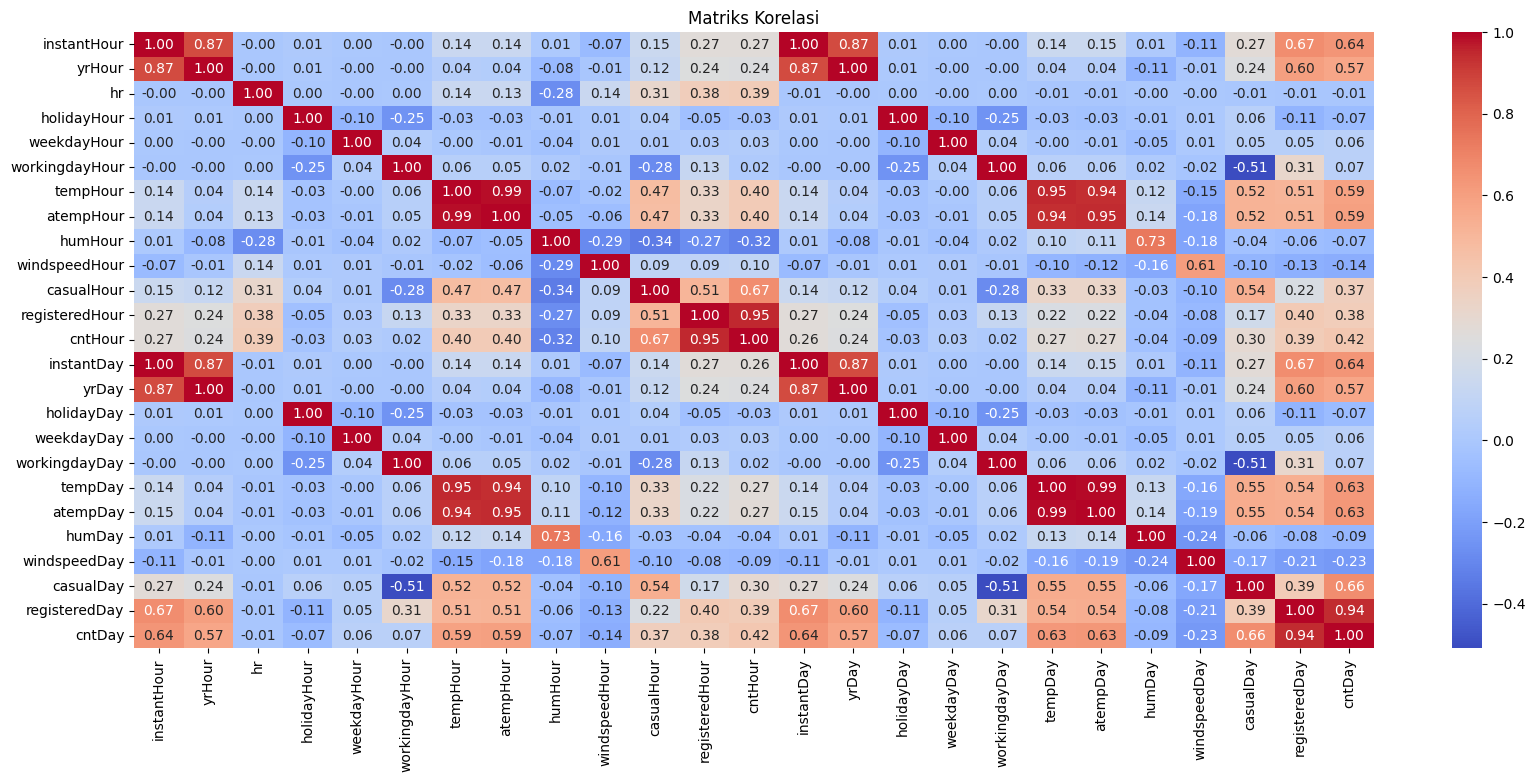

In [21]:
#Membuat correlation matrix dataframe merge
correlation_matrix = df.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

<ipython-input-22-16cee4d93cd5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfDay.corr()


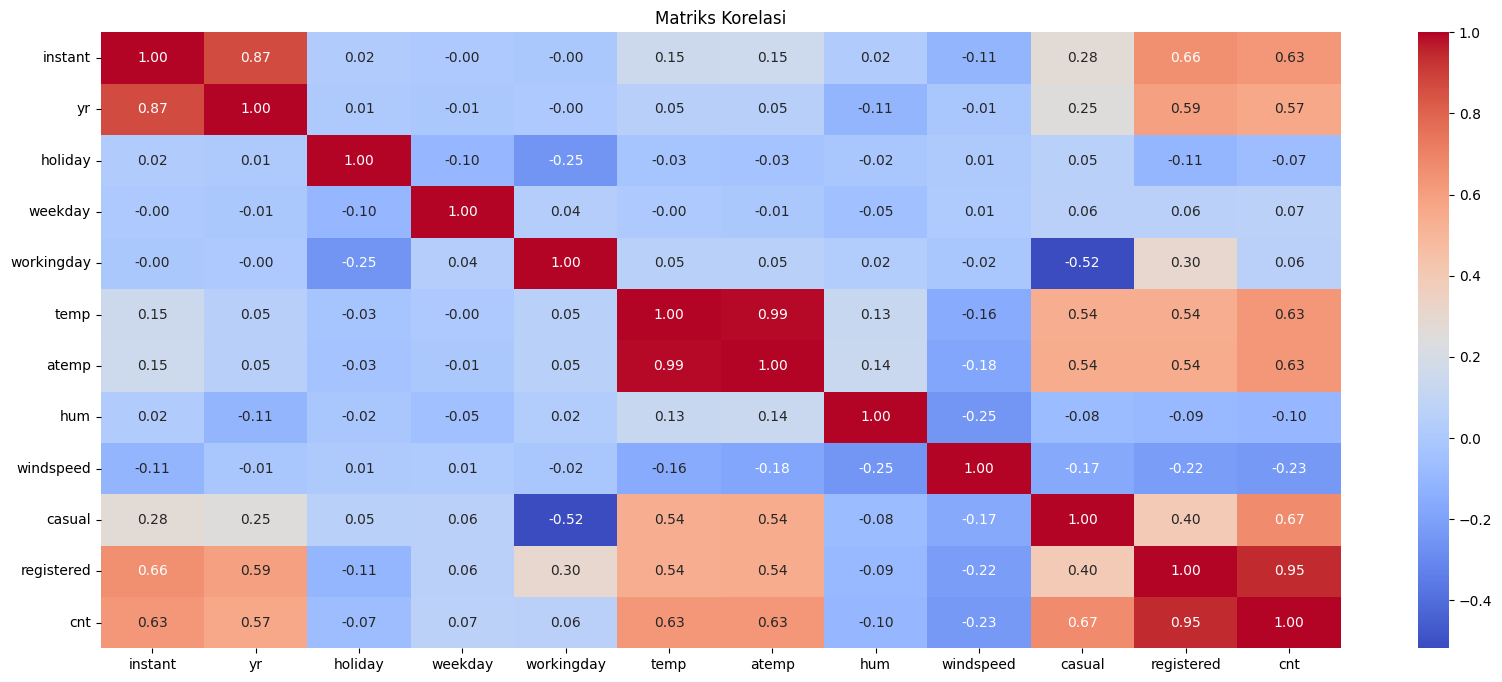

In [22]:
#Membuat correlation matrix dataframe per hari
correlation_matrix = dfDay.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

<ipython-input-23-5604388ff78f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfHour.corr()


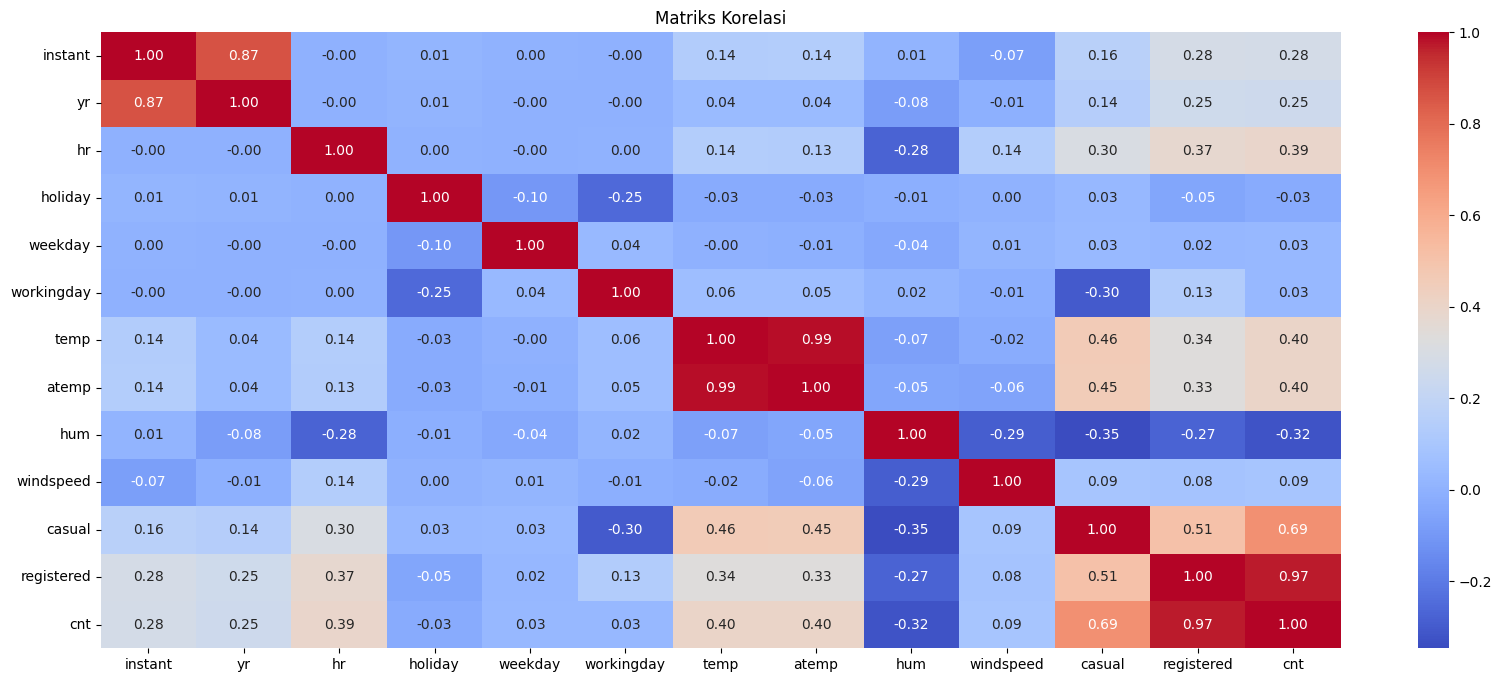

In [23]:
#Membuat correlation matrix dataframe per jam
correlation_matrix = dfHour.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

Dapat dilihat sepertnya terdapat korelasi yang lumayan signifikan pada temp dan atemp, juga pada humidity pada dataset per hari

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Mari kita lihat penyebaran data rata - rata penyewaan sepeda berdasarkan kondisi cuaca dengan menggunakan barplot

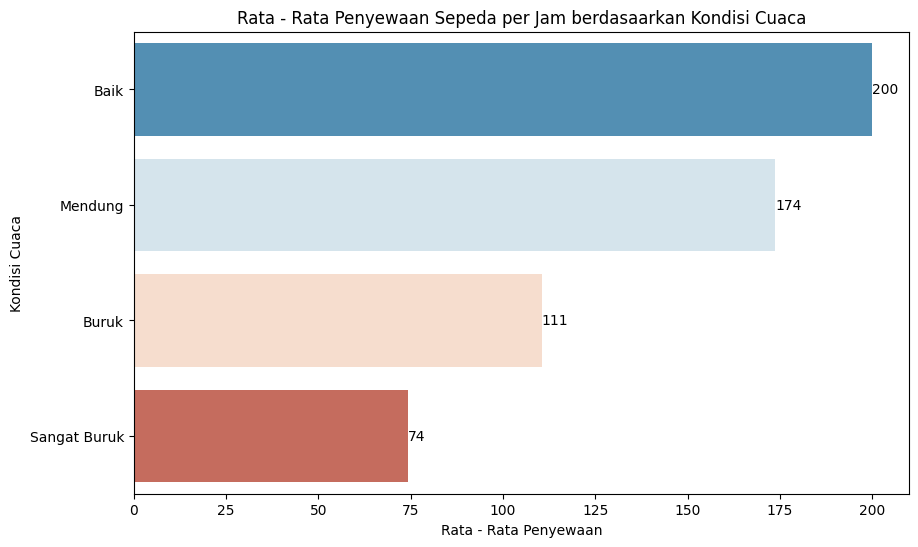

In [24]:
#Membuat barplot rata rata penyewaan sepeda per jam berdasarkan kondisi cuaca
data = df.groupby('weathersitHour')['cntHour'].mean().reset_index().sort_values("cntHour", ascending=False)

palette = sns.color_palette("RdBu", 4)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='cntHour', y='weathersitHour', data=data, palette=palette, hue="cntHour", orient = "h", legend = False)

plt.title('Rata - Rata Penyewaan Sepeda per Jam berdasaarkan Kondisi Cuaca')
plt.xlabel('Rata - Rata Penyewaan')
plt.ylabel('Kondisi Cuaca')

for index, value in enumerate(data['cntHour']):
    barplot.text(value, index, round(value), ha='left', va='center')

plt.show()

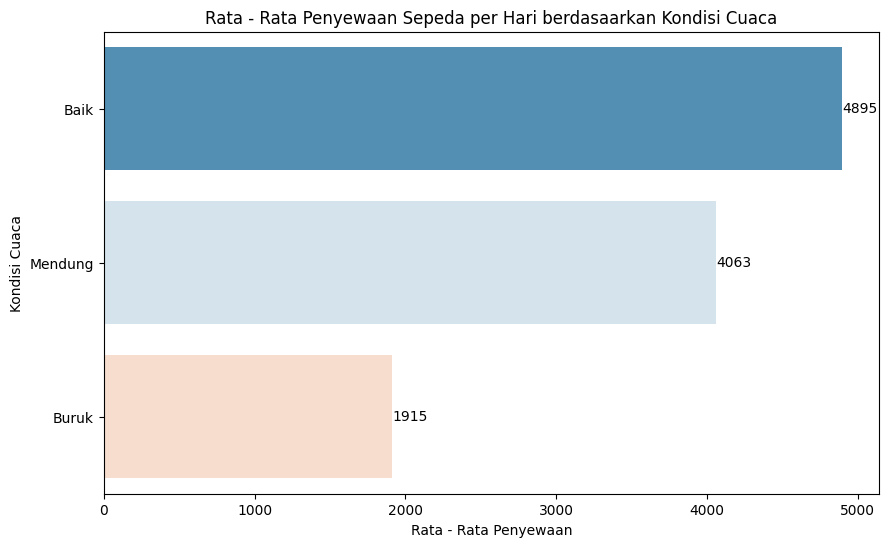

In [25]:
#Membuat barplot rata rata penyewaan sepeda per Hari berdasarkan kondisi cuaca
data = df.groupby('weathersitDay')['cntDay'].mean().reset_index().sort_values("cntDay", ascending=False)

palette = sns.color_palette("RdBu", 4)[1:]

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='cntDay', y='weathersitDay', data=data, palette=palette, hue="cntDay", orient = "h", legend = False)

plt.title('Rata - Rata Penyewaan Sepeda per Hari berdasaarkan Kondisi Cuaca')
plt.xlabel('Rata - Rata Penyewaan')
plt.ylabel('Kondisi Cuaca')

for index, value in enumerate(data['cntDay']):
    barplot.text(value, index, round(value), ha='left', va='center')


plt.show()

Dapat dilihat semakin buruk cuaca semakin sedikit juga penyewa sepeda, mari kita lakukan analisis lanjutan untuk faktor cuaca seperti kelembapan, suhu, suhu yang dirasa dan kecepatan angin

In [26]:
#Melakukan Denormalisasi kelembapan, dan kecepatan angin
df["humHour"] = df["humHour"] * 100
df["humDay"] = df["humDay"] * 100
df["windspeedHour"] = df["windspeedHour"] * 67
df["windspeedDay"] = df["windspeedDay"] * 67

# Nilai t_min dan t_max
t_min = -8
t_max = 39

# Denormalisasi kolom "temp_normalized"
df['tempDay'] = (df['tempDay'] * (t_max - t_min)) + t_min
df['tempHour'] = (df['tempHour'] * (t_max - t_min)) + t_min

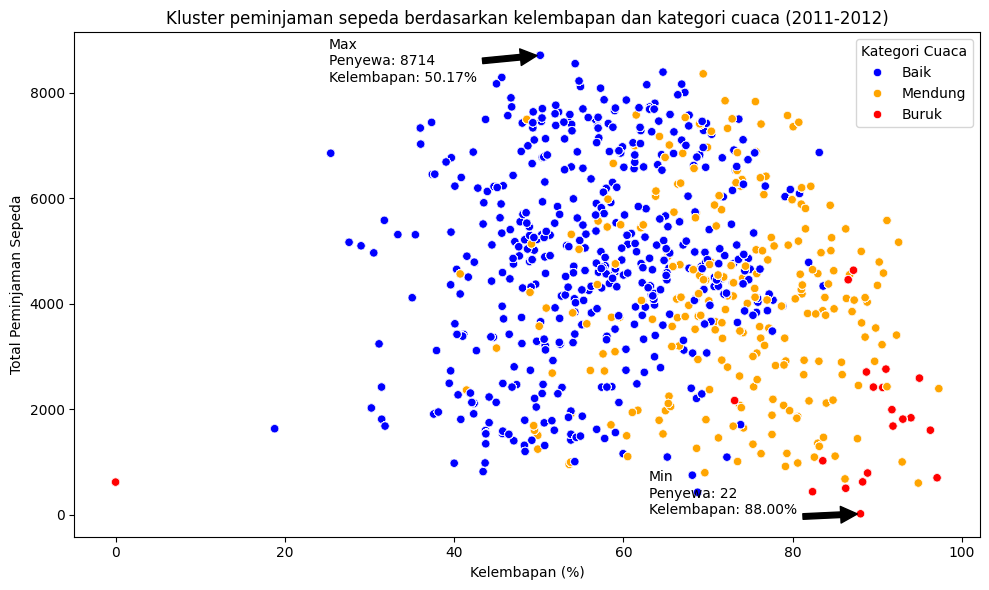

In [27]:
palette = {"Baik": "blue", "Mendung": "orange", "Buruk": "red"}

# Membuat scatter plot
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(x='humDay', y='cntDay', data=df, hue='weathersitDay', palette=palette, hue_order=["Baik", "Mendung", "Buruk"])
plt.xlabel("Kelembapan (%)")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Kluster peminjaman sepeda berdasarkan kelembapan dan kategori cuaca (2011-2012)")

# Mencari nilai maksimum dari peminjaman sepeda
maxCount = df['cntDay'].max()
maxHumidity = df.loc[df['cntDay'].idxmax()]['humDay']
plt.annotate(f'Max\nPenyewa: {maxCount}\nKelembapan: {maxHumidity:.2f}%',
             xy=(maxHumidity, maxCount),
             xytext=(maxHumidity - 25, maxCount - 500),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Mencari nilai minimum dari peminjaman sepeda
minCount = df['cntDay'].min()
minHumidity = df.loc[df['cntDay'].idxmin()]['humDay']
plt.annotate(f'Min\nPenyewa: {minCount}\nKelembapan: {minHumidity:.2f}%',
             xy=(minHumidity, minCount),
             xytext=(minHumidity - 25, minCount),
             arrowprops=dict(facecolor='black', shrink=0.05))

handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=["Baik", "Mendung", "Buruk"], title="Kategori Cuaca")

plt.tight_layout()
plt.show()


Pada tahap klustering ini, kita membuat sebuah membagi data menjadi beberapa cluster berdasarkan kategori cuacanya yiatu Baik, Mendung dan Buruk. Klustering ini dibuat untuk mempermudah kita melihat korelasi antara kondisi cuaca, statistik cuaca serta peminjaman sepeda. Berdasarkan scatter plot diatas, terdapat korelasi antara kategori cuaca dan kelembapan, semakin buruk cuaca semakin tinggi kelembapannya dengan ada satu outliers pada cuaca buruk, selain itu dapat dilihat kelembapan optimal dalam peminjaman sepeda ialah diantara 40-75 %, setelah melewati angka 80% total peminjaman sepeda terlihat menurun.

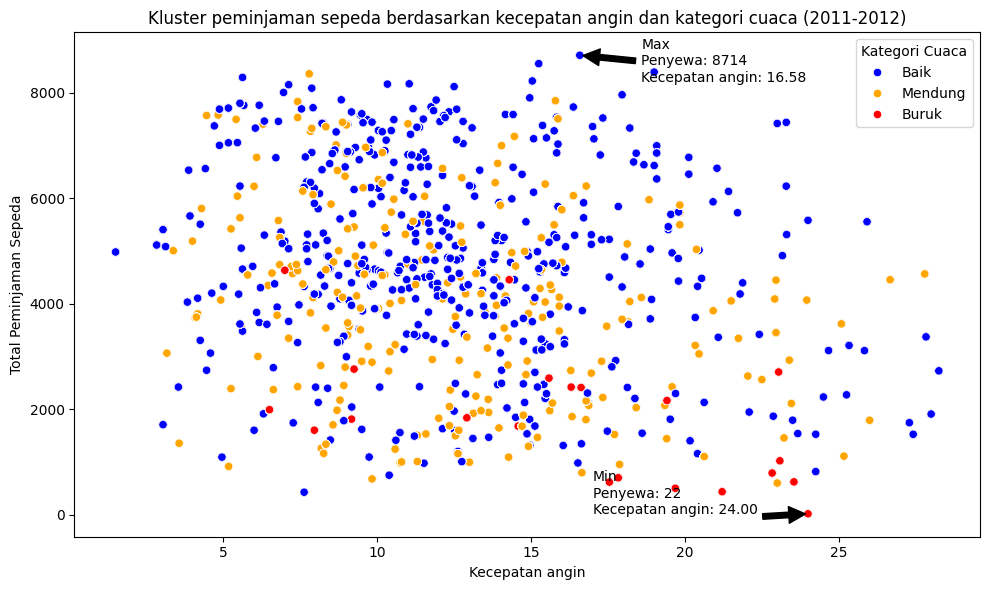

In [28]:
palette = {"Baik": "blue", "Mendung": "orange", "Buruk": "red"}

#Membuat scatter plot
plt.figure(figsize=(10,6))

sns.scatterplot(x='windspeedDay', y='cntDay', data=df, hue='weathersitDay', palette=palette, hue_order=["Baik", "Mendung", "Buruk"])

plt.xlabel("Kecepatan angin")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Kluster peminjaman sepeda berdasarkan kecepatan angin dan kategori cuaca (2011-2012)")

# Mencari nilai maksimum dari peminjaman sepeda
maxCount = df['cntDay'].max()
maxWindspeed = df.loc[df['cntDay'].idxmax()]['windspeedDay']
plt.annotate(f'Max\nPenyewa: {maxCount}\nKecepatan angin: {maxWindspeed:.2f}',
             xy=(maxWindspeed, maxCount),
             xytext=(maxWindspeed + 2, maxCount - 500),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Mencari nilai minimum dari peminjaman sepeda
minCount = df['cntDay'].min()
minWindspeed = df.loc[df['cntDay'].idxmin()]['windspeedDay']
plt.annotate(f'Min\nPenyewa: {minCount}\nKecepatan angin: {minWindspeed:.2f}',
             xy=(minWindspeed, minCount),
             xytext=(minWindspeed - 7, minCount),
             arrowprops=dict(facecolor='black', shrink=0.05))

handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=["Baik", "Mendung", "Buruk"], title="Kategori Cuaca")

plt.legend(title="Kategori Cuaca")
plt.tight_layout()
plt.show()

Berdasarkan scatter plot diatas, tidak terdapat korelasi yang jelas antara kategori cuaca dan kecepatan angin tetapi dapat dilihat terdapat korelasi antara kecepatan angin dan peminjaman sepeda di mana ketika kecepatan angin sudah melewati 20 terdapat penurutan jumlah peminjaman sepeda, kecepatan optimal dalam peminjaman sepeda ialah diantara 5-20

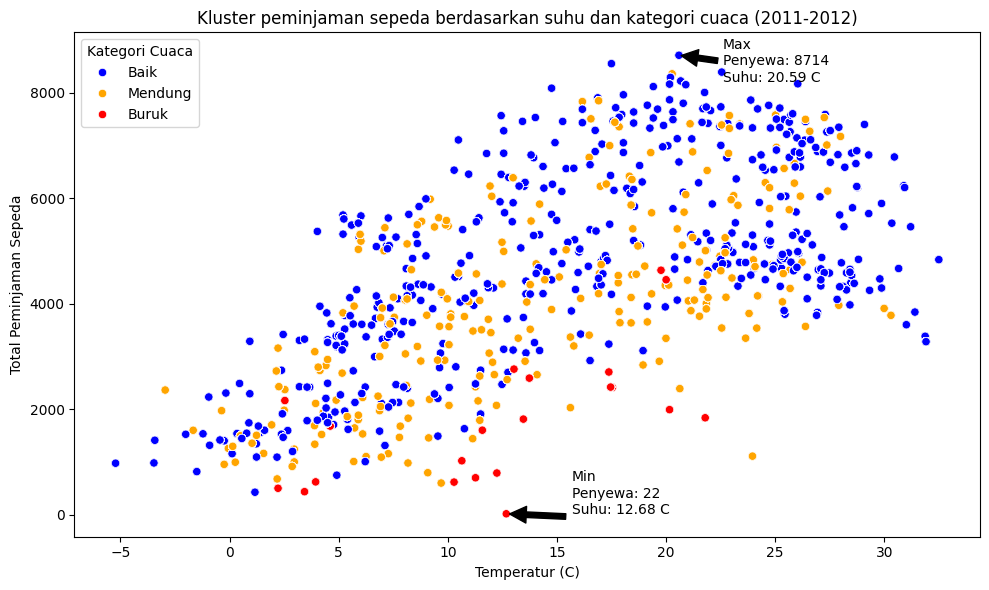

In [29]:
palette = {"Baik": "blue", "Mendung": "orange", "Buruk": "red"}

plt.figure(figsize=(10,6))

sns.scatterplot(x='tempDay', y='cntDay', data=df, hue='weathersitDay', palette=palette, hue_order=["Baik", "Mendung", "Buruk"])
plt.xlabel("Temperatur (C)")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Kluster peminjaman sepeda berdasarkan suhu dan kategori cuaca (2011-2012)")

# Mencari nilai maksimum dari peminjaman sepeda
maxCount = df['cntDay'].max()
maxTemp = df.loc[df['cntDay'].idxmax()]['tempDay']
plt.annotate(f'Max\nPenyewa: {maxCount}\nSuhu: {maxTemp:.2f} C',
             xy=(maxTemp, maxCount),
             xytext=(maxTemp + 2, maxCount - 500),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Mencari nilai minimum dari peminjaman sepeda
minCount = df['cntDay'].min()
minTemp = df.loc[df['cntDay'].idxmin()]['tempDay']
plt.annotate(f'Min\nPenyewa: {minCount}\nSuhu: {minTemp:.2f} C',
             xy=(minTemp, minCount),
             xytext=(minTemp +3, minCount),
             arrowprops=dict(facecolor='black', shrink=0.05))

handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=["Baik", "Mendung", "Buruk"], title="Kategori Cuaca")

# Show the plot
plt.legend(title="Kategori Cuaca")
plt.tight_layout()
plt.show()

Berdasarkan scatter plot diatas, tidak terdapat korelasi yang jelas antara kategori cuaca dengan Temperatur tetapi Cuaca sangat buruk biasa bersekitar di antara 2-23 Celsius, selain itu terdapat korelasi antara temperatur dan peminjaman sepeda di mana ketika temperatur sudah kurang dari 15 Celsius terdapat penurutan jumlah peminjaman sepeda, temperatur optimal dalam peminjaman sepeda ialah diantara 15-25 Celsius

### Pertanyaan 2:

In [30]:
#Mencari tanggal mulai masing-masing musim tahun 2011
dingin = dfDay["dteday"][dfDay.index[dfDay['season'] == 'Dingin'].min()]
dinginText = dfDay["dteday"][dfDay.index[dfDay['season'] == 'Dingin'].min()+5]
semi = dfDay["dteday"][dfDay.index[dfDay['season'] == 'Semi'].min()]
semiText = dfDay["dteday"][dfDay.index[dfDay['season'] == 'Semi'].min()+5]
panas = dfDay["dteday"][dfDay.index[dfDay['season'] == 'Panas'].min()]
panasText = dfDay["dteday"][dfDay.index[dfDay['season'] == 'Panas'].min()+5]
gugur = dfDay["dteday"][dfDay.index[dfDay['season'] == 'Gugur'].min()]
gugurText = dfDay["dteday"][dfDay.index[dfDay['season'] == 'Gugur'].min()+5]
panas

Timestamp('2011-06-21 00:00:00')

In [31]:
#Mencari tanggal mulai masing-masing musim tahun 2012
filtered_df = dfDay[dfDay['dteday'].dt.year >= 2012]

dingin2 = dfDay["dteday"][filtered_df.index[filtered_df['season'] == 'Dingin'].min()]
dingin2Text = dfDay["dteday"][filtered_df.index[filtered_df['season'] == 'Dingin'].min()+5]
semi2 = dfDay["dteday"][filtered_df.index[filtered_df['season'] == 'Semi'].min()]
semi2Text = dfDay["dteday"][filtered_df.index[filtered_df['season'] == 'Semi'].min()+5]
panas2 = dfDay["dteday"][filtered_df.index[filtered_df['season'] == 'Panas'].min()]
panas2Text = dfDay["dteday"][filtered_df.index[filtered_df['season'] == 'Panas'].min()+5]
gugur2 = dfDay["dteday"][filtered_df.index[filtered_df['season'] == 'Gugur'].min()]
gugur2Text = dfDay["dteday"][filtered_df.index[filtered_df['season'] == 'Gugur'].min()+5]

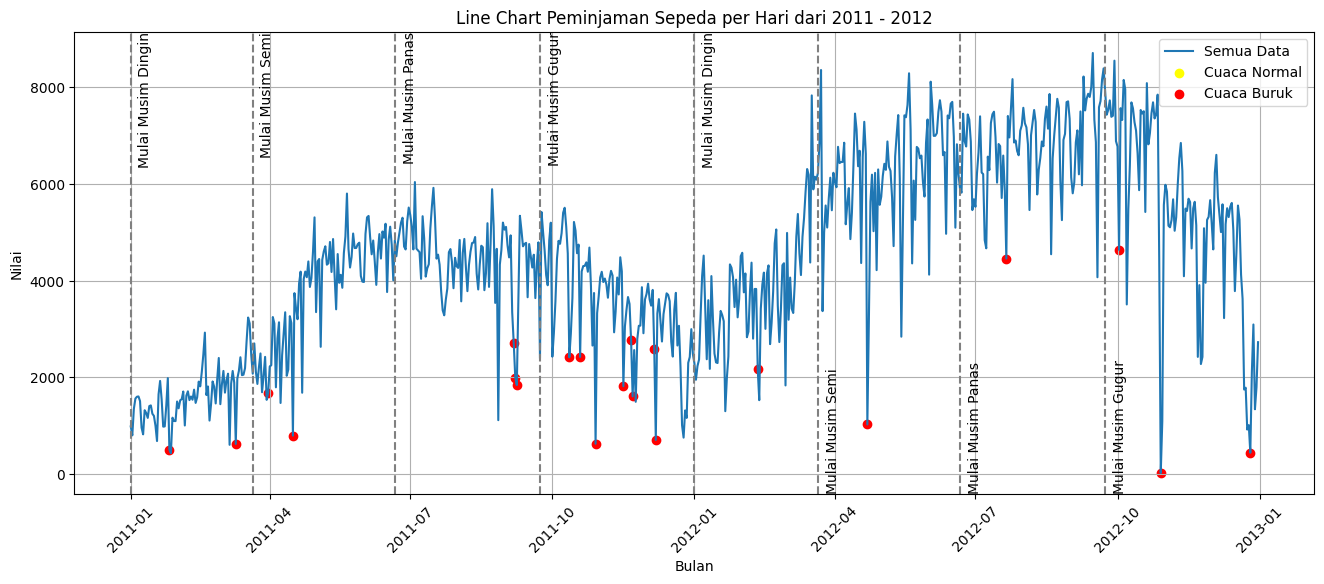

In [32]:
#Membuat line plot
dfDay['dteday'] = pd.to_datetime(dfDay['dteday'])
dfDay['bulan'] = dfDay['dteday'].dt.strftime('%B')

# Plotting
plt.figure(figsize=(16,6))

# Line plot untuk semua data
plt.plot(dfDay['dteday'], dfDay['cnt'], label='Semua Data')

# Scatter plot tambahan ketika cuaca normal
plt.scatter(dfDay[dfDay["weathersit"] == "Normal"]['dteday'],
            dfDay[dfDay["weathersit"] == "Normal"]['cnt'],
            color='yellow', label='Cuaca Normal')

# Scatter plot tambahan ketika cuaca buruk
plt.scatter(dfDay[dfDay["weathersit"] == "Buruk"]['dteday'],
            dfDay[dfDay["weathersit"] == "Buruk"]['cnt'],
            color='red', label='Cuaca Buruk')

# Menambahkan garis untuk tiap musim
plt.axvline(x=dingin, color='gray', linestyle='--', label=None)
plt.axvline(x=semi, color='gray', linestyle='--', label=None)
plt.axvline(x=panas, color='gray', linestyle='--', label=None)
plt.axvline(x=gugur, color='gray', linestyle='--', label=None)
plt.text(dinginText, plt.ylim()[1], 'Mulai Musim Dingin', ha='left', va='top', rotation=90)
plt.text(semiText, plt.ylim()[1], 'Mulai Musim Semi', ha='left', va='top', rotation=90)
plt.text(panasText, plt.ylim()[1], 'Mulai Musim Panas', ha='left', va='top', rotation=90)
plt.text(gugurText, plt.ylim()[1], 'Mulai Musim Gugur', ha='left', va='top', rotation=90)

plt.axvline(x=dingin2, color='gray', linestyle='--', label=None)
plt.axvline(x=semi2, color='gray', linestyle='--', label=None)
plt.axvline(x=panas2, color='gray', linestyle='--', label=None)
plt.axvline(x=gugur2, color='gray', linestyle='--', label=None)
plt.text(dingin2Text, plt.ylim()[1], 'Mulai Musim Dingin', ha='left', va='top', rotation=90)
plt.text(semi2Text, plt.ylim()[0], 'Mulai Musim Semi', ha='left', va='bottom', rotation=90)
plt.text(panas2Text, plt.ylim()[0], 'Mulai Musim Panas', ha='left', va='bottom', rotation=90)
plt.text(gugur2Text, plt.ylim()[0], 'Mulai Musim Gugur', ha='left', va='bottom', rotation=90)


plt.title('Line Chart Peminjaman Sepeda per Hari dari 2011 - 2012')
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [33]:
df.to_csv("dataMerge.csv", index=False)

In [34]:
dfDay.to_csv("dataDay.csv", index=False)

In [35]:
dfHour.to_csv("dataHour.csv", index=False)

Berdasarkan line plot diatas range bulan paling ramai ialah Juli - Oktober tiap tahunnya, walaupun begitu terdapat beberapa hari ketika peminjaman sepeda sangat rendah, hal ini dikarenakan faktor kategori cuaca yang buruk, tetapi seperti pada pertanyaan 1, selain kategori cuaca statistik cuaca seperti temperatur, kecepatan angin dan kelembapan juga mempengaruhi total peminjaman sepeda, oleh karena itu ada saat ketika cuaca normal tetapi total peminjaman sepeda masih tinggi

## Conclusion

**Pertanyaan 1:** Seberapa besar faktor cuaca mempengaruhi kenaikkan penggunaan sepeda?

- Cuaca menjadi salah satu faktor utama yang mempengaruhi penyewaan sepeda, untuk kategori cuaca saja penurunan dari rata - rata jumlah penyewaan sepeda dari cuaca baik ke cuaca sangat buruk mencapai hingga **63%**

- Selain kategori cuaca, statistik cuaca seperti kelembapan, temperatur dan kecepatan angin juga mempengaruhi jumlah penyewaan sepeda. Sebagai contoh pada saat kondisi cuaca baik dan dalam kelembapan optimal penyewaan sepeda pada hari itu bisa mencapai hingga **8714** sedangkan saat cuaca buruk dan kelembapan tinggi penyewaan sepeda bisa turun hingga hanya **22** saja

**Pertanyaan 2:** Pada range bulan apa saja sepeda paling banyak dipinjam pada periode 2011-2012?
- Range bulan paling ramai pada tiap tahunnya ialah pada bulan Juli-Oktober, hal ini mungkin dibantu oleh faktor musim yaitu jatuh pada musim panas di mana biasanya cuacanya sering cerah, tetapi pada saat cuaca sedang buruk akan terjadi penurunan jumlah peminjaman sepeda